### Phase 3: Data Integration and Exploratory Data Analysis (EDA)

#### Objective:
    Combine three CSV files into a single dataframe using pandas' concat/merge/join operations and initiate the Exploratory Data Analysis (EDA) process.

#### Goal:
    Merge three CSV files into a single dataframe.Perform complete EDA to gain insights into the data.Document detailed observations for each aspect of the analysis.

### Phase 4: Machine Learning and Predictive Modeling 

#### Objective: 
    Develop machine learning models to make predictions of rental price and Area based on the integrated dataset. Implement best practices for preprocessing, scaling, hyperparameter tuning, and model evaluation.

#### Goal:

#### Create separate models for predicting:

Rental price and 
Area

#### Implement the following best practices:

Data preprocessing: Handle missing values, categorical encoding, etc.
Feature scaling: Apply appropriate techniques for scaling numerical features.
Hyperparameter tuning: Optimize model parameters to enhance predictive performance.
Avoid underfitting or overfitting: Balance bias and variance through proper model selection and parameter tuning.
Save the best-performing models based on thorough evaluation.

#### Communicate the chosen model selection criteria:

Describe the basis for selecting the best models for both rental price and Area predictions.
Highlight the techniques used to prevent underfitting or overfitting.

### Rentberry

Rentberry facilitates the long-term home rental process for both tenants and landlords. It help tenants save time on apartment hunting and landlords get the right tenant and rental rates. Rentberry took care of each stage of the leasing process.



#### Importing necessary Libraries

In [401]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessor, Scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Evaluation & Metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Saving Model
import joblib

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

<b>Since i have created the rentberry.csv file in the previous tables file i have concated all the three csv files of table1, table2 and table3. So now i am reading the rentberry.csv file.</b>

In [2]:
df = pd.read_csv('rentberry.csv')
df

,Sl_No,Address,City,State,Country,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,1,801 West 5th Street,Austin,TX,USA,280946,280946,2,2,1400,Yes,No,No,No,No,No,No,No,No
1,2,1000 East 5th Street,Austin,TX,USA,167237,167237,1,1,765,Yes,No,No,No,No,No,No,No,No
2,3,110 San Antonio Street,Austin,TX,USA,312032,312032,2,2,1148,Yes,No,No,No,No,No,No,No,No
3,4,615 West 7th Street,Austin,TX,USA,325997,325997,2,2,1030,Yes,No,No,No,No,No,No,No,No
4,5,"Austin, Jollyville, TX, US",Austin,TX,USA,92928,92928,1,1,630,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,6992,"Emeryville, CA, 94608",Sanfrancisco,CA,USA,703195,0,2,2,602,Yes,No,Yes,Yes,No,No,No,No,No
6992,6993,"San Francisco, CA",Sanfrancisco,CA,USA,458822,0,1,1,650,Yes,No,No,Yes,No,Yes,No,No,No
6993,6994,"145 Arkansas Street, San Francisco, CA 90103, USA",Sanfrancisco,CA,USA,315773,315773,2,1,950,No,No,No,Yes,No,No,Yes,Yes,Yes
6994,6995,"San Francisco, CA",Sanfrancisco,CA,USA,663298,0,1,1,245,Yes,No,Yes,Yes,No,No,No,No,No


In [3]:
df.head()

,Sl_No,Address,City,State,Country,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,1,801 West 5th Street,Austin,TX,USA,280946,280946,2,2,1400,Yes,No,No,No,No,No,No,No,No
1,2,1000 East 5th Street,Austin,TX,USA,167237,167237,1,1,765,Yes,No,No,No,No,No,No,No,No
2,3,110 San Antonio Street,Austin,TX,USA,312032,312032,2,2,1148,Yes,No,No,No,No,No,No,No,No
3,4,615 West 7th Street,Austin,TX,USA,325997,325997,2,2,1030,Yes,No,No,No,No,No,No,No,No
4,5,"Austin, Jollyville, TX, US",Austin,TX,USA,92928,92928,1,1,630,Yes,No,No,No,No,No,No,No,No


We see that head method gives the first five rows of dataset.

In [4]:
df.tail()

,Sl_No,Address,City,State,Country,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
6991,6992,"Emeryville, CA, 94608",Sanfrancisco,CA,USA,703195,0,2,2,602,Yes,No,Yes,Yes,No,No,No,No,No
6992,6993,"San Francisco, CA",Sanfrancisco,CA,USA,458822,0,1,1,650,Yes,No,No,Yes,No,Yes,No,No,No
6993,6994,"145 Arkansas Street, San Francisco, CA 90103, USA",Sanfrancisco,CA,USA,315773,315773,2,1,950,No,No,No,Yes,No,No,Yes,Yes,Yes
6994,6995,"San Francisco, CA",Sanfrancisco,CA,USA,663298,0,1,1,245,Yes,No,Yes,Yes,No,No,No,No,No
6995,6996,"San Francisco, CA",Sanfrancisco,CA,USA,595970,0,1,1,235,Yes,No,Yes,Yes,No,No,No,No,No


We see that tail method gives the last five rows of the dataset.

In [5]:
# Checking the dimension of data
print('We have {} rows and {} columns in our dataframe'.format(*df.shape))
print('\n')

We have 6996 rows and 19 columns in our dataframe




In [6]:
# Checking the column names in our dataframe
print('Columns in our dataframe are:\n', df.columns)

Columns in our dataframe are:
 Index(['Sl_No', 'Address', 'City', 'State', 'Country', 'Price', 'Deposit',
       'Bedrooms', 'Bathrooms', 'Area', 'Pets', 'WasherDryer', 'AC', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwoodfloors', 'Roofdeck', 'storage'],
      dtype='object')


Description:
1. Sl_No: It gives the index numbers or the number of instances in dataset.
2. Address: It is the address of the house or apartment available for rent.
3. City: It is the city in which the house or apartment available for rent.
4. Country: It is the country details of the house or apartment available for rent.
5. State: It is the State in which house or apartment available for rent.
6. Price: It is the actual rent to be paid per month.
7. Deposit: It is the deposit amount which need to be paid only once other than rent.
8. Bedrooms: It is the number of bedroom available in house
9. Bathrooms: It is the number of bathrooms available in house.
10. Area: It is the dimension or the space in which house is available(in Sqft).
11. Pets: It is the data about whether pets are allowed or not.
12. WasherDryer: It is about whether washer/dryer is available or not.
13. AC: It is about whether AC is available or not.
14. Parking: It is about whether Parkingr is available or not.
15. Fireplace: It is about whether Fireplace is available or not.
16. Dishwasher: It is about whether Dishwasher is available or not.
17. Hardwoodfloors: It is about whether Hardwoodfloors is available or not.
18. Roofdeck: It is about whether Roofdeck is available or not.
19. storage: It is about whether storage is available or not.

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sl_No           6996 non-null   int64 
 1   Address         6991 non-null   object
 2   City            6996 non-null   object
 3   State           6996 non-null   object
 4   Country         6996 non-null   object
 5   Price           6996 non-null   int64 
 6   Deposit         6996 non-null   int64 
 7   Bedrooms        6996 non-null   object
 8   Bathrooms       6947 non-null   object
 9   Area            6996 non-null   int64 
 10  Pets            6996 non-null   object
 11  WasherDryer     6996 non-null   object
 12  AC              6996 non-null   object
 13  Parking         6996 non-null   object
 14  Fireplace       6996 non-null   object
 15  Dishwasher      6996 non-null   object
 16  Hardwoodfloors  6996 non-null   object
 17  Roofdeck        6996 non-null   object
 18  storage 

Observation:
    We see that there are 6996 rows and 19 columns in which 17 columns are features and 2 columns are our target variables Since both the targets are continous we need to build two regression models. 
    

In [8]:
df.duplicated().sum()

0

We see there are no duplicates in the dataset.

### Check for Missing Values.

In [10]:
#Checking Missing Values
print("Total {} Missing Values are present in our Dataframe".format(df.isna().sum().sum()))
print('\n')

# Checking for Missing values
missing_values = df.isna().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


Total 54 Missing Values are present in our Dataframe


                Missing Values  % Missing data
Bathrooms                   49        0.700400
Address                      5        0.071469
Sl_No                        0        0.000000
WasherDryer                  0        0.000000
Roofdeck                     0        0.000000
Hardwoodfloors               0        0.000000
Dishwasher                   0        0.000000
Fireplace                    0        0.000000
Parking                      0        0.000000
AC                           0        0.000000
Area                         0        0.000000
Pets                         0        0.000000
Bedrooms                     0        0.000000
Deposit                      0        0.000000
Price                        0        0.000000
Country                      0        0.000000
State                        0        0.000000
City                         0        0.000000
storage                      0        0.000000


We see there are 54 values missing in the dataset i.e., 49 values from feature bathrooms and 5 values in feature address. next we will fill these null values using perfect methods.

#### Check for Value Counts in each Column.

In [11]:
for i in df:
    print(df[i].value_counts())
    print("*" * 50)

1       1
4662    1
4673    1
4672    1
4671    1
       ..
2328    1
2327    1
2326    1
2325    1
6996    1
Name: Sl_No, Length: 6996, dtype: int64
**************************************************
Nashville-Davidson, TN                                                         405
Miami, FL                                                                      365
San Francisco, CA                                                              339
Pittsburgh, PA                                                                 327
Mesa, AZ                                                                       146
                                                                              ... 
Paterson Avenue at Harrison Street, Paterson Avenue, Hoboken, NJ 07310, USA      1
48 Coles Street, Jersey City, NJ 07302, USA                                      1
276 Princeton Avenue, Jersey City, NJ 07305, USA                                 1
33 Grace Street, Jersey City, NJ 07307, USA         

we see that bathrooms are having categorical data and also we see that the number of bedrooms is almost equal to number of bathrooms in most of the houses so its better to replace the nulls with the corresponding values of bedroom instead of mode method. If we use mode methods the area or bedrooms may be less and bathrooms may be more or vice versa which is not possible so we consider the value of bathroom to be filled by corresponding values of bedroom.

In [12]:
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bedrooms'])

In [13]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*50)

Sl_No
[   1    2    3 ... 6994 6995 6996]
**************************************************
Address
['801 West 5th Street' '1000 East 5th Street' '110 San Antonio Street' ...
 '600 S Hayes St, 32' '1427 9th Ave'
 '145 Arkansas Street, San Francisco, CA 90103, USA']
**************************************************
City
['Austin' 'buffalo' 'Dallas' 'Irvine' 'Jersey City' 'Las Vegas' 'Mesa'
 'Miami' 'Nashville' 'Pittsburg' 'Sanfrancisco']
**************************************************
State
['TX' 'NY' 'CA' 'NJ' 'NV' 'AZ' 'FL' 'TN' 'PA']
**************************************************
Country
['USA']
**************************************************
Price
[ 280946  167237  312032 ... 1633308 2077169 1640789]
**************************************************
Deposit
[ 280946  167237  312032  325997   92928   67327  265984  477940  124680
  328324  457160  182448  415184  448848       0  195332  248944  132576
  199488  406872  249360  232736  257672  274296  315856  120108  1516

We see that bathroom and bedrooms are in object datatype because of bedroom has value studio and bathroom has value 9+ which we will replace 9+ by 10 and studio by 1 since studios will be always of space area which consist of 1 bathroom, bedroom, kitchen and living area as there will be no separation between rooms.  

In [14]:
df['Bathrooms'].replace({'9+ ':10}, inplace = True)
df['Bedrooms'].replace({'Studio':1}, inplace=True)

In [16]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*50)

Sl_No
[   1    2    3 ... 6994 6995 6996]
**************************************************
Address
['801 West 5th Street' '1000 East 5th Street' '110 San Antonio Street' ...
 '600 S Hayes St, 32' '1427 9th Ave'
 '145 Arkansas Street, San Francisco, CA 90103, USA']
**************************************************
City
['Austin' 'buffalo' 'Dallas' 'Irvine' 'Jersey City' 'Las Vegas' 'Mesa'
 'Miami' 'Nashville' 'Pittsburg' 'Sanfrancisco']
**************************************************
State
['TX' 'NY' 'CA' 'NJ' 'NV' 'AZ' 'FL' 'TN' 'PA']
**************************************************
Country
['USA']
**************************************************
Price
[ 280946  167237  312032 ... 1633308 2077169 1640789]
**************************************************
Deposit
[ 280946  167237  312032  325997   92928   67327  265984  477940  124680
  328324  457160  182448  415184  448848       0  195332  248944  132576
  199488  406872  249360  232736  257672  274296  315856  120108  1516

We see bedrooms and bathrooms are still in object datatype sso we need to convert it to float or int data.

In [17]:
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(float)

In [18]:
df.dtypes

Sl_No               int64
Address            object
City               object
State              object
Country            object
Price               int64
Deposit             int64
Bedrooms            int32
Bathrooms         float64
Area                int64
Pets               object
WasherDryer        object
AC                 object
Parking            object
Fireplace          object
Dishwasher         object
Hardwoodfloors     object
Roofdeck           object
storage            object
dtype: object

In [19]:
df.isnull().sum()

Sl_No             0
Address           5
City              0
State             0
Country           0
Price             0
Deposit           0
Bedrooms          0
Bathrooms         0
Area              0
Pets              0
WasherDryer       0
AC                0
Parking           0
Fireplace         0
Dishwasher        0
Hardwoodfloors    0
Roofdeck          0
storage           0
dtype: int64

We see that there are some columns which are unwanted and need to be drooped so we will drop those columns and clean the dataset.

we see there are null values in address column and also we see most of values are unique which are not similar and Sl_No also has unique values and Country column has only one value i.e., USA, which are not necessary for building a model so we will drop these 3 columns. 

In [79]:
df.drop(columns = ['Sl_No','Address','Country'], axis = 1, inplace= True)
df

,City,State,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,Austin,TX,280946,280946,2,2.0,1400,Yes,No,No,No,No,No,No,No,No
1,Austin,TX,167237,167237,1,1.0,765,Yes,No,No,No,No,No,No,No,No
2,Austin,TX,312032,312032,2,2.0,1148,Yes,No,No,No,No,No,No,No,No
3,Austin,TX,325997,325997,2,2.0,1030,Yes,No,No,No,No,No,No,No,No
4,Austin,TX,92928,92928,1,1.0,630,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,Sanfrancisco,CA,703195,0,2,2.0,602,Yes,No,Yes,Yes,No,No,No,No,No
6992,Sanfrancisco,CA,458822,0,1,1.0,650,Yes,No,No,Yes,No,Yes,No,No,No
6993,Sanfrancisco,CA,315773,315773,2,1.0,950,No,No,No,Yes,No,No,Yes,Yes,Yes
6994,Sanfrancisco,CA,663298,0,1,1.0,245,Yes,No,Yes,Yes,No,No,No,No,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            6996 non-null   object 
 1   State           6996 non-null   object 
 2   Price           6996 non-null   int64  
 3   Deposit         6996 non-null   int64  
 4   Bedrooms        6996 non-null   int32  
 5   Bathrooms       6996 non-null   float64
 6   Area            6996 non-null   int64  
 7   Pets            6996 non-null   object 
 8   WasherDryer     6996 non-null   object 
 9   AC              6996 non-null   object 
 10  Parking         6996 non-null   object 
 11  Fireplace       6996 non-null   object 
 12  Dishwasher      6996 non-null   object 
 13  Hardwoodfloors  6996 non-null   object 
 14  Roofdeck        6996 non-null   object 
 15  storage         6996 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(11)
memory usage: 847.3+ KB


we see that our data is clean and also there is no null values.

We see that earlier we had 6996 rows and 19 columns.After cleaning the data and removing the unwanted columns and filling null values finally we have 16 columns in which 11 are object type, 1 float type and 4 are of integer type and memory usage has reduced to 847.3 KB. 

In [82]:
## separating categorical and numerical data 
categorical=[]
numerical = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
    else:
        numerical.append(i)
print('Categorical Columns are: ', categorical)
print('Numerical Columns are: ', numerical)

Categorical Columns are:  ['City', 'State', 'Pets', 'WasherDryer', 'AC', 'Parking', 'Fireplace', 'Dishwasher', 'Hardwoodfloors', 'Roofdeck', 'storage']
Numerical Columns are:  ['Price', 'Deposit', 'Bedrooms', 'Bathrooms', 'Area']


### Description of dataset

In [80]:
df.describe()

,Price,Deposit,Bedrooms,Bathrooms,Area
count,6.996000e+03,6.996000e+03,6996.000000,6996.000000,6996.000000
mean,4.921772e+05,1.926823e+05,2.815609,2.200629,1811.037164
std,5.772221e+05,2.879082e+05,1.293528,1.118188,1965.567935
min,5.070300e+04,0.000000e+00,1.000000,0.500000,100.000000
25%,2.036440e+05,0.000000e+00,2.000000,1.000000,1000.000000
50%,3.117000e+05,1.620840e+05,3.000000,2.000000,1522.500000
75%,5.572780e+05,2.640098e+05,4.000000,3.000000,2148.000000
max,7.578050e+06,7.480800e+06,16.000000,10.000000,48973.000000


#### We see that
1. Counts of all columns are equal i.e., 6996 instances.
2. Standard deviation is high compared to mean in all columns except Bedrooms and bathrooms.
3. mean is high compared to median in columns like Price, Deposit and area whivh means right skewness and bedroom and bathrooms have left skewness.
4. There is no such hige difference between percentiles and max except Area column which means there are outliers in Area.
#### Price
5. Min Value of Price is 50000 and max value is approximately equal to 75 Lakhs and Mean Price is 4.92 Lakhs and Median(50 Percentile) is 3.11 Lakhs approximately.
#### Deposit
6. Minimum deposit value is 0 which means there is no deposit required for some properties may be they are for lease. Maximum value is 74 Lakhs, Mean is 1.92 Lakhs and Median Values ranges from 1.62 Lakhs approximately.
#### Bedrooms
7. There are properties which are having minimum 1 bedroom and maximum of 16 bedrooms and Median of 3 bedrooms.These depends on the area of the properties.Most of the properties here are having 3 Bedrooms
#### Bathrooms
8. There are properties which are having minimum of 0.5 Bathroom and maximum of 10 bathrooms based on number of bedrooms bathrooms will be designed.Here also most properties have 2 bathrooms.
#### Area
9. There are properties with starting with 100 sqft(minimum) upto 48973 Sqft(Maximum).  Most of the properties in the dataset are having area between 1500 to 2000 sqft.

### Univariate Analysis

Mesa            905
Las Vegas       847
Miami           834
Nashville       829
Dallas          765
Sanfrancisco    749
Pittsburg       510
Jersey City     496
Irvine          458
Austin          379
buffalo         224
Name: City, dtype: int64


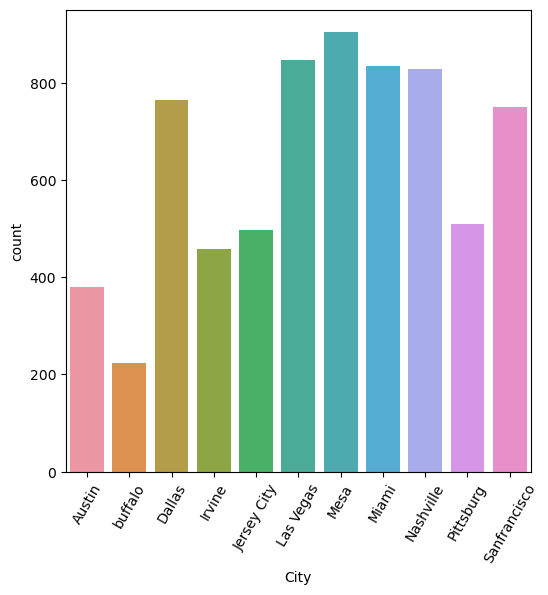

In [25]:
#count plot for Survived
plt.figure(figsize = (6,6))
sns.countplot(x = 'City', data = df)
plt.xticks(rotation = 60)
print(df['City'].value_counts())
plt.show()

We see that huge instances are from city Mesa and cities like Lasvegas, Miami and Nashville are having almost equal instances and very least instances are from city Buffalo and Austin.

CA    1207
TX    1144
AZ     905
NV     847
FL     834
TN     829
PA     510
NJ     496
NY     224
Name: State, dtype: int64


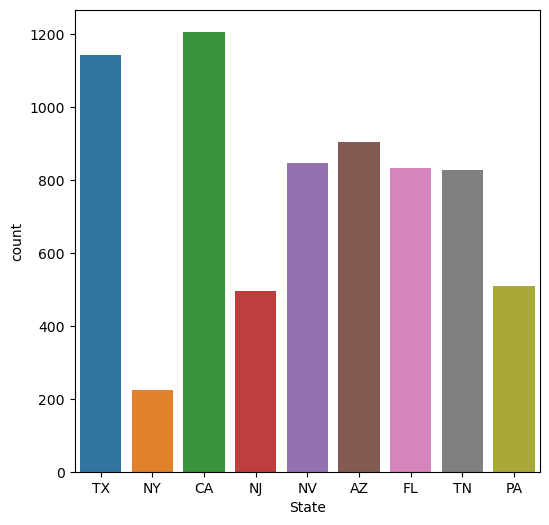

In [26]:
#count plot for Survived
plt.figure(figsize = (6,6))
sns.countplot(x = 'State', data = df)
print(df['State'].value_counts())
plt.show()

We see there are 9 state codes and in that California(CA) and Texas(TX) are having huge instances compared to all other states. States like NV, AZ, FL, TN are having almost same proportion of data. PA and NJ are having almost equal instances whereas NewYork(NY) has the very least instances. 

3     2246
2     1574
4     1448
1     1220
5      374
6       89
8       17
7       14
12       4
10       4
9        2
16       2
11       1
13       1
Name: Bedrooms, dtype: int64


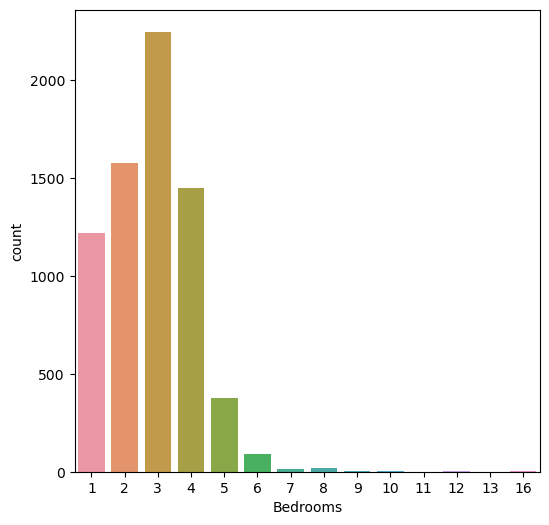

In [27]:
#count plot for Survived
plt.figure(figsize = (6,6))
sns.countplot(x = 'Bedrooms', data = df)
print(df['Bedrooms'].value_counts())
plt.show()

We see that there are properties having bedrooms ranging from 1 to 16 but huge data is for properties having 3 rooms almost 2500 data. The properties with 1, 2 and 4 rooms data is below 1500. There are less than 10 properties with rooms 9, 10, 11, 12, 13 and 16.

2.0     2188
1.0     2040
3.0     1114
2.5      695
4.0      377
3.5      196
4.5      106
5.0       91
1.5       89
6.0       29
5.5       29
8.0       13
10.0       9
7.0        7
6.5        7
0.5        3
7.5        2
2.1        1
Name: Bathrooms, dtype: int64


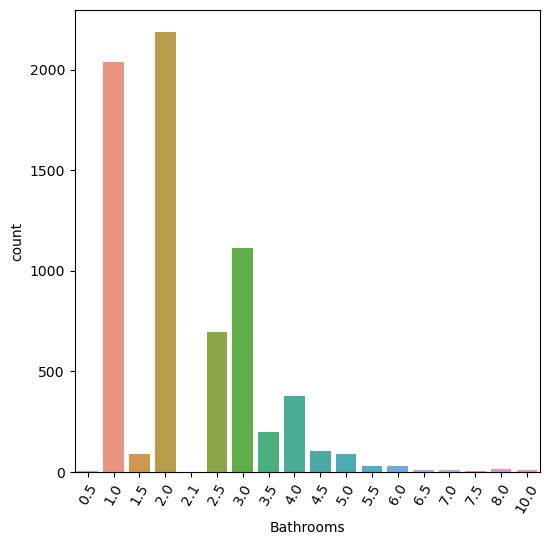

In [28]:
#count plot for Survived
plt.figure(figsize = (6,6))
sns.countplot(x = 'Bathrooms', data = df)
plt.xticks(rotation = 60)
print(df['Bathrooms'].value_counts())
plt.show()

We see there are properties with bathrooms ranging between 0.5 to 10 where as the most properties have 1 and 2bathrooms compared to all others. The properties with bathrooms count 1.5,6,5,5.5,8,10,7,6.5,0.5,7.5,2.1 are very less that is below 100 properties.

No     5623
Yes    1373
Name: Pets, dtype: int64


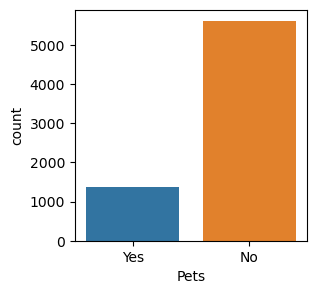

In [29]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'Pets', data = df)
print(df['Pets'].value_counts())
plt.show()

We see that there are very less properties(1400) which allow pets and almost 5400 properties does not allow pets.

No     6967
Yes      29
Name: WasherDryer, dtype: int64


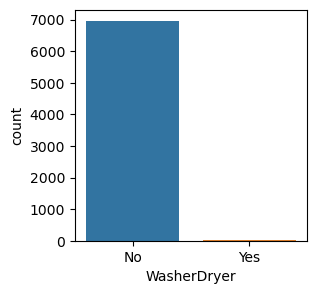

In [30]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'WasherDryer', data = df)
print(df['WasherDryer'].value_counts())
plt.show()

We see that only 29 properties are having the facility of washer/dryer and other properties almost 6900 properties does not have washer/dryer facility.  

No     4405
Yes    2591
Name: AC, dtype: int64


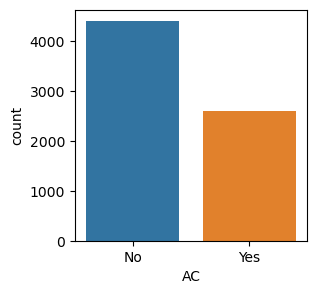

In [31]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'AC', data = df)
print(df['AC'].value_counts())
plt.show()

We see that 4400 properties does not have amenity 'AC' and only 2600 properties have AC.

No     4436
Yes    2560
Name: Parking, dtype: int64


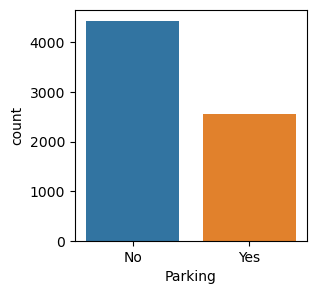

In [32]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'Parking', data = df)
print(df['Parking'].value_counts())
plt.show()

We see that 4400 properties does not have parking facility and only 2560 properties have parking facility.

No     4528
Yes    2468
Name: Dishwasher, dtype: int64


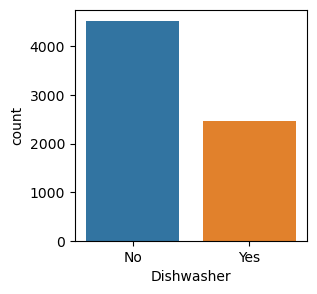

In [33]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'Dishwasher', data = df)
print(df['Dishwasher'].value_counts())
plt.show()

We see that almost 4528 properties does not have dishwasher and only 2468 properties have dishwasher facility.

No     6341
Yes     655
Name: Fireplace, dtype: int64


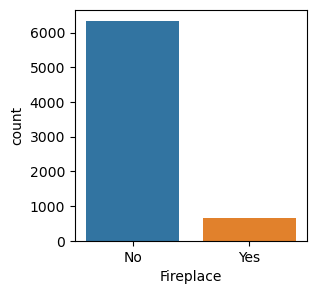

In [34]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'Fireplace', data = df)
print(df['Fireplace'].value_counts())
plt.show()

We see that 6341 properties doesnot have fireplace and only 655 properties have fireplace.

No     6745
Yes     251
Name: Hardwoodfloors, dtype: int64


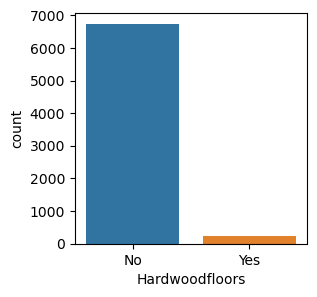

In [35]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'Hardwoodfloors', data = df)
print(df['Hardwoodfloors'].value_counts())
plt.show()

We see only 250 properties have hardwoodfloors and rest properties have different type of floor.

No     6811
Yes     185
Name: Roofdeck, dtype: int64


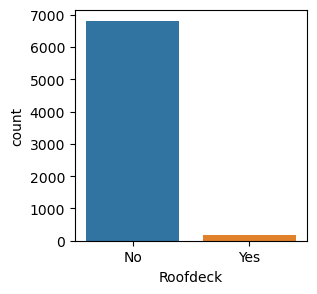

In [36]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'Roofdeck', data = df)
print(df['Roofdeck'].value_counts())
plt.show()

We see that only 185 properties are having roofdeck and other properties have sundeck.

No     6866
Yes     130
Name: storage, dtype: int64


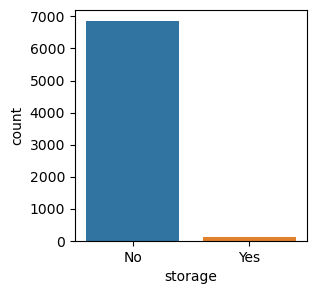

In [37]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.countplot(x = 'storage', data = df)
print(df['storage'].value_counts())
plt.show()

We see that only 130 properties are having storage place and 6866 properties doesnot have storage.

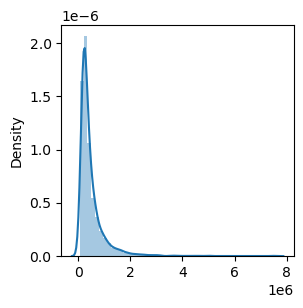

In [38]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.distplot(x=df['Price'])
plt.show()

We see that price ranges from 50000 to 700000 and most values are from 50000 to 10 Lakhs. We see there is a huge skewness from 30 lakhs onwards.

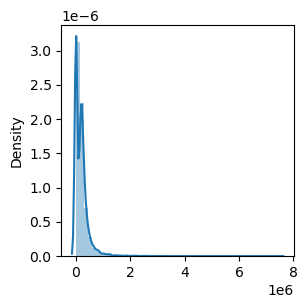

In [74]:
#count plot for Survived
plt.figure(figsize = (3,3))
sns.distplot(x = df['Deposit'])
plt.show()

We see that in deposit there are most values for 0 which means there is no deposit required may be for lease house and most values are below 10 lakhs. Here also there is huge skewness.

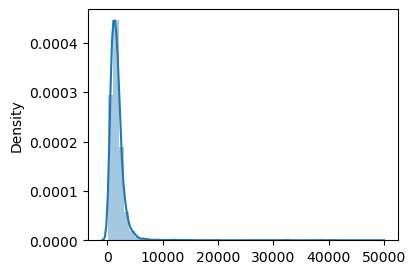

In [40]:
#count plot for Survived
plt.figure(figsize = (4,3))
sns.distplot(x = df['Area'])
plt.show()

We see there is more instances for area below 7000sqft and very less instances for area above 10000 sqft.

### Bivariate Analysis

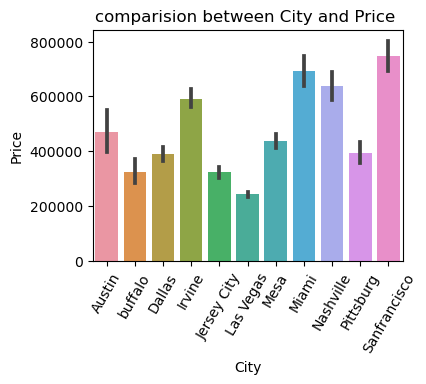

In [41]:
#comparision of City with target Price.
plt.figure(figsize = (4,3))
plt.title('comparision between City and Price ')
sns.barplot(x='City', y='Price', data = df)
plt.xticks(rotation = 60)
plt.show()

We see that prices are high in the cities like Sanfrancisco, Miami and Nashville But very least in cities like Las Vegas and Buffalo.

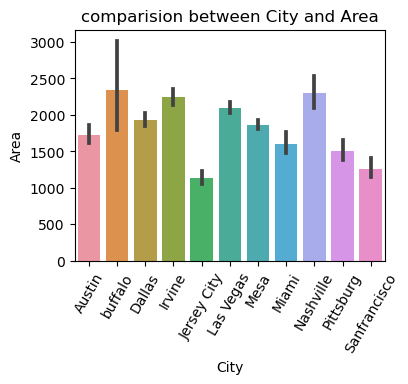

In [42]:
#comparision of City with target Price.
plt.figure(figsize = (4,3))
plt.title('comparision between City and Area')
sns.barplot(x='City', y='Area', data = df)
plt.xticks(rotation = 60)
plt.show()

Buffalo, Nashville are having highest area but in the previous graph we saw the cost is less in buffalo.We may consider that city Buffalo has large properties with less price compared to all other cities.

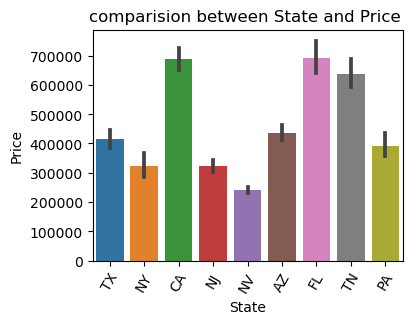

In [43]:
#comparision of state with target Price.
plt.figure(figsize = (4,3))
plt.title('comparision between State and Price ')
sns.barplot(x='State', y='Price', data = df)
plt.xticks(rotation = 60)
plt.show()

In the State like CA and FL are having high prices compared to all other states. Very least is from the state NV

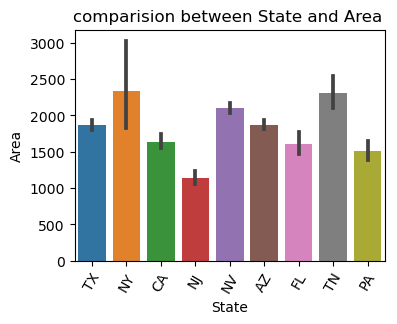

In [44]:
#comparision of state with target Area.
plt.figure(figsize = (4,3))
plt.title('comparision between State and Area ')
sns.barplot(x='State', y='Area', data = df)
plt.xticks(rotation = 60)
plt.show()

Here also NY and TN states are having huge area properties compared to all other states very least is from City NJ.

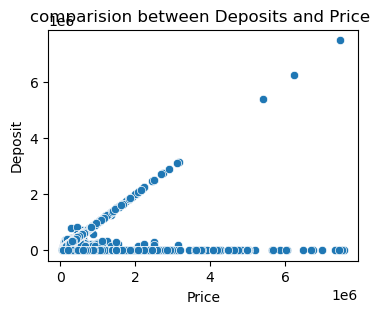

In [45]:
#comparision of Deposits with target Price.
plt.figure(figsize = (4,3))
plt.title('comparision between Deposits and Price ')
sns.scatterplot(x='Price', y='Deposit', data = df)
plt.show()

We see that there is no specific pattern in this price and deposit columns because for some properties there is no deposit amount and for most of the properties deposit is equal to price.We also see that only for very few properties deposit increases compared to actual price.

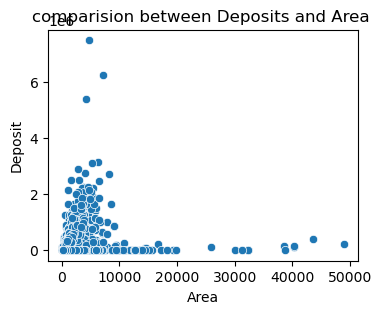

In [46]:
#comparision of Deposits with target Area.
plt.figure(figsize = (4,3))
plt.title('comparision between Deposits and Area ')
sns.scatterplot(x='Area', y='Deposit', data = df)
plt.show()

We see that most of the properties area lies within 10000sqft and deposit also lies within some points there is no such increasing or decreasing pattern. We also see there are outliers.

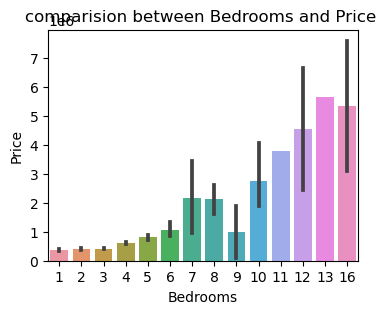

In [47]:
#comparision of Bedrooms with target Price.
plt.figure(figsize = (4,3))
plt.title('comparision between Bedrooms and Price ')
sns.barplot(x='Bedrooms', y='Price', data = df)
plt.show()

We see that Price increases as the bedroom count increases.

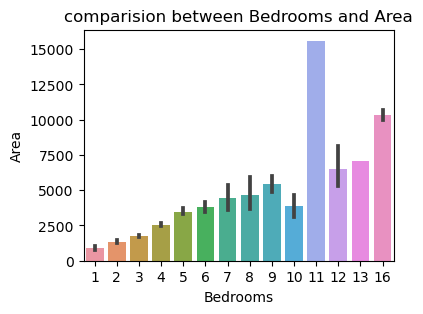

In [48]:
#comparision of Bedrooms with target Area.
plt.figure(figsize = (4,3))
plt.title('comparision between Bedrooms and Area')
sns.barplot(x='Bedrooms', y='Area', data = df)
plt.show()

We see here also the same pattern almost i.e., bedrooms increases the sqft also increases but for properties with 11 rooms have higher sqft compared to all other count of rooms

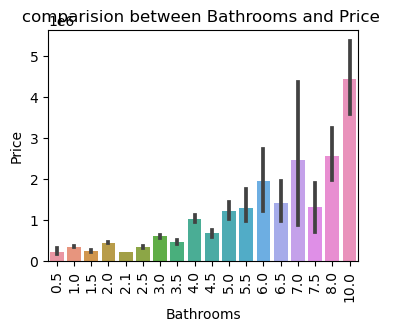

In [50]:
#comparision of Bathrooms with target Price.
plt.figure(figsize = (4,3))
plt.title('comparision between Bathrooms and Price ')
sns.barplot(x='Bathrooms', y='Price', data = df)
plt.xticks(rotation= 90)
plt.show()

We see that as the number bathrooms increases the price is also increasing

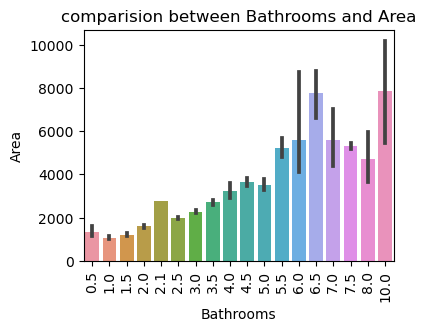

In [52]:
#comparision of Bathrooms with target Area.
plt.figure(figsize = (4,3))
plt.title('comparision between Bathrooms and Area')
sns.barplot(x='Bathrooms', y='Area', data = df)
plt.xticks(rotation = 90)
plt.show()

It is almost in form of increasing direction except for few properties there is slight variation.

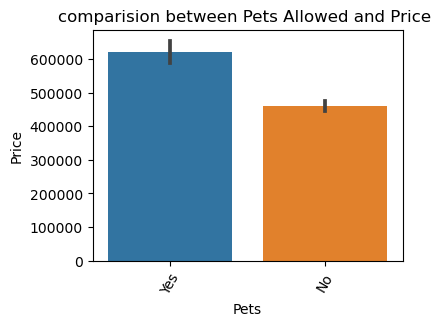

In [53]:
#comparision of pets with target Price.
plt.figure(figsize = (4,3))
plt.title('comparision between Pets Allowed and Price ')
sns.barplot(x='Pets', y='Price', data = df)
plt.xticks(rotation = 60)
plt.show()

We see that if pets are allowed then the rental price is also high.

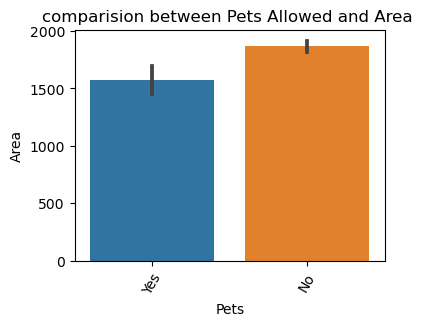

In [109]:
#comparision of pets with target Area.
plt.figure(figsize = (4,3))
plt.title('comparision between Pets Allowed and Area ')
sns.barplot(x='Pets', y='Area', data = df)
plt.xticks(rotation = 60)
plt.show()

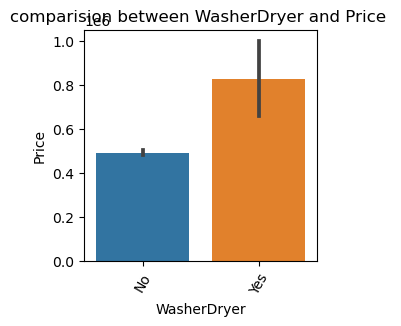

In [110]:
#comparision of WasherDryer with target Price.
plt.figure(figsize = (3,3))
plt.title('comparision between WasherDryer and Price ')
sns.barplot(x='WasherDryer', y='Price', data = df)
plt.xticks(rotation = 60)
plt.show()

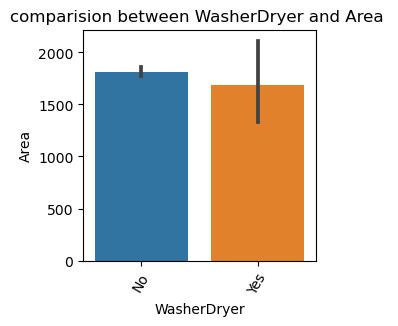

In [56]:
#comparision of WasherDryer with target Area.
plt.figure(figsize = (3,3))
plt.title('comparision between WasherDryer and Area ')
sns.barplot(x='WasherDryer', y='Area', data = df)
plt.xticks(rotation = 60)
plt.show()

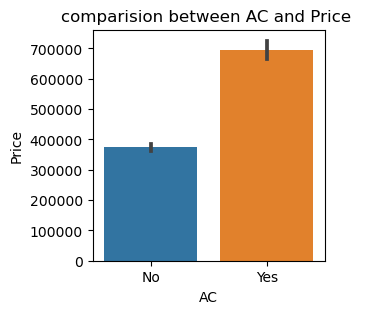

In [57]:
#comparision of AC with target Price.
plt.figure(figsize = (3,3))
plt.title('comparision between AC and Price ')
sns.barplot(x='AC', y='Price', data = df)
plt.show()

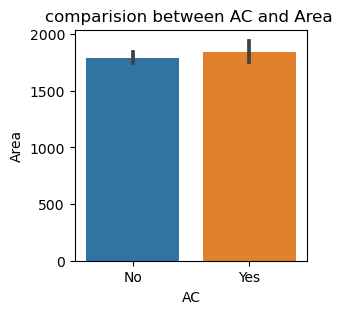

In [111]:
#comparision of AC with target Area.
plt.figure(figsize = (3,3))
plt.title('comparision between AC and Area ')
sns.barplot(x='AC', y='Area', data = df)
plt.show()

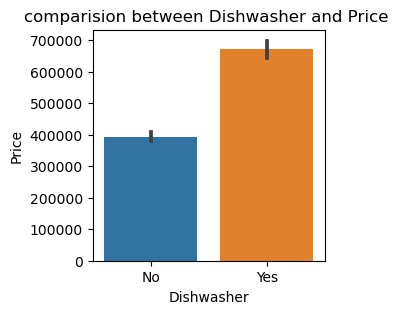

In [112]:
#comparision of Dishwasher with target Price.
plt.figure(figsize = (3,3))
plt.title('comparision between Dishwasher and Price ')
sns.barplot(x='Dishwasher', y='Price', data = df)
plt.show()

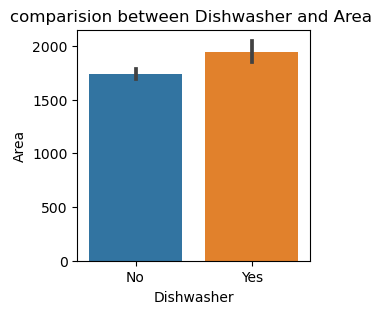

In [60]:
#comparision of Dishwasher with target Area.
plt.figure(figsize = (3,3))
plt.title('comparision between Dishwasher and Area ')
sns.barplot(x='Dishwasher', y='Area', data = df)
plt.show()

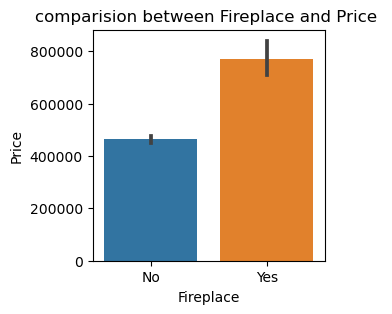

In [61]:
#comparision of Fireplace with target Price.
plt.figure(figsize = (3,3))
plt.title('comparision between Fireplace and Price ')
sns.barplot(x='Fireplace', y='Price', data = df)
plt.show()

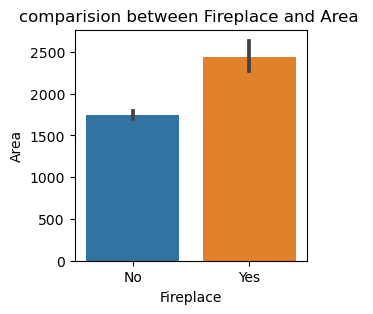

In [113]:
#comparision of Fireplace with target Area.
plt.figure(figsize = (3,3))
plt.title('comparision between Fireplace and Area ')
sns.barplot(x='Fireplace', y='Area', data = df)
plt.show()

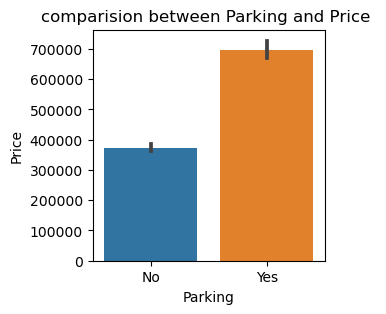

In [63]:
#comparision of Parking with target Price.
plt.figure(figsize = (3,3))
plt.title('comparision between Parking and Price ')
sns.barplot(x='Parking', y='Price', data = df)
plt.show()

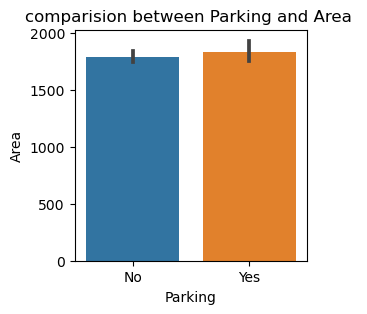

In [114]:
#comparision of Parking with target Area.
plt.figure(figsize = (3,3))
plt.title('comparision between Parking and Area ')
sns.barplot(x='Parking', y='Area', data = df)
plt.show()

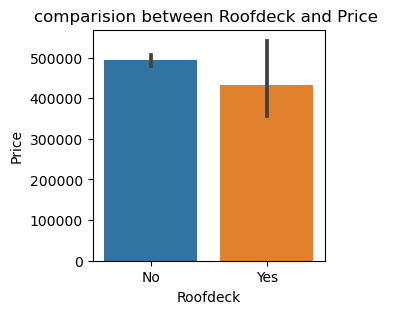

In [115]:
#comparision of Roofdeck with target Price.
plt.figure(figsize = (3,3))
plt.title('comparision between Roofdeck and Price ')
sns.barplot(x='Roofdeck', y='Price', data = df)
plt.show()

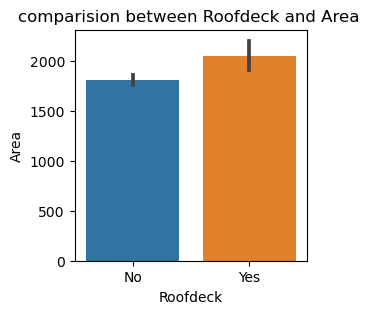

In [70]:
#comparision of Roofdeck with target Area.
plt.figure(figsize = (3,3))
plt.title('comparision between Roofdeck and Area ')
sns.barplot(x='Roofdeck', y='Area', data = df)
plt.show()

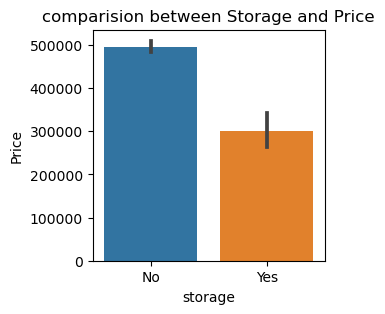

In [116]:
#comparision of Storage with target Price.
plt.figure(figsize = (3,3))
plt.title('comparision between Storage and Price')
sns.barplot(x='storage', y='Price', data = df)
plt.show()

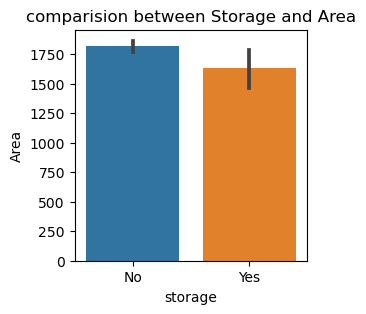

In [72]:
#comparision of Storage with target Area.
plt.figure(figsize = (3,3))
plt.title('comparision between Storage and Area')
sns.barplot(x='storage', y='Area', data = df)
plt.show()

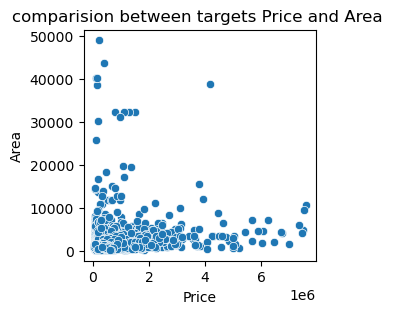

In [73]:
#comparision Between both targets.
plt.figure(figsize = (3,3))
plt.title('comparision between targets Price and Area ')
sns.scatterplot(x='Price', y='Area', data = df)
plt.show()

From all the above plots we see that for most of the properties if amenities are provided then the price is also more and area is varying. When we compare area and price most of the properties price and area is within some particular value. 

#### Multivariate Analysis

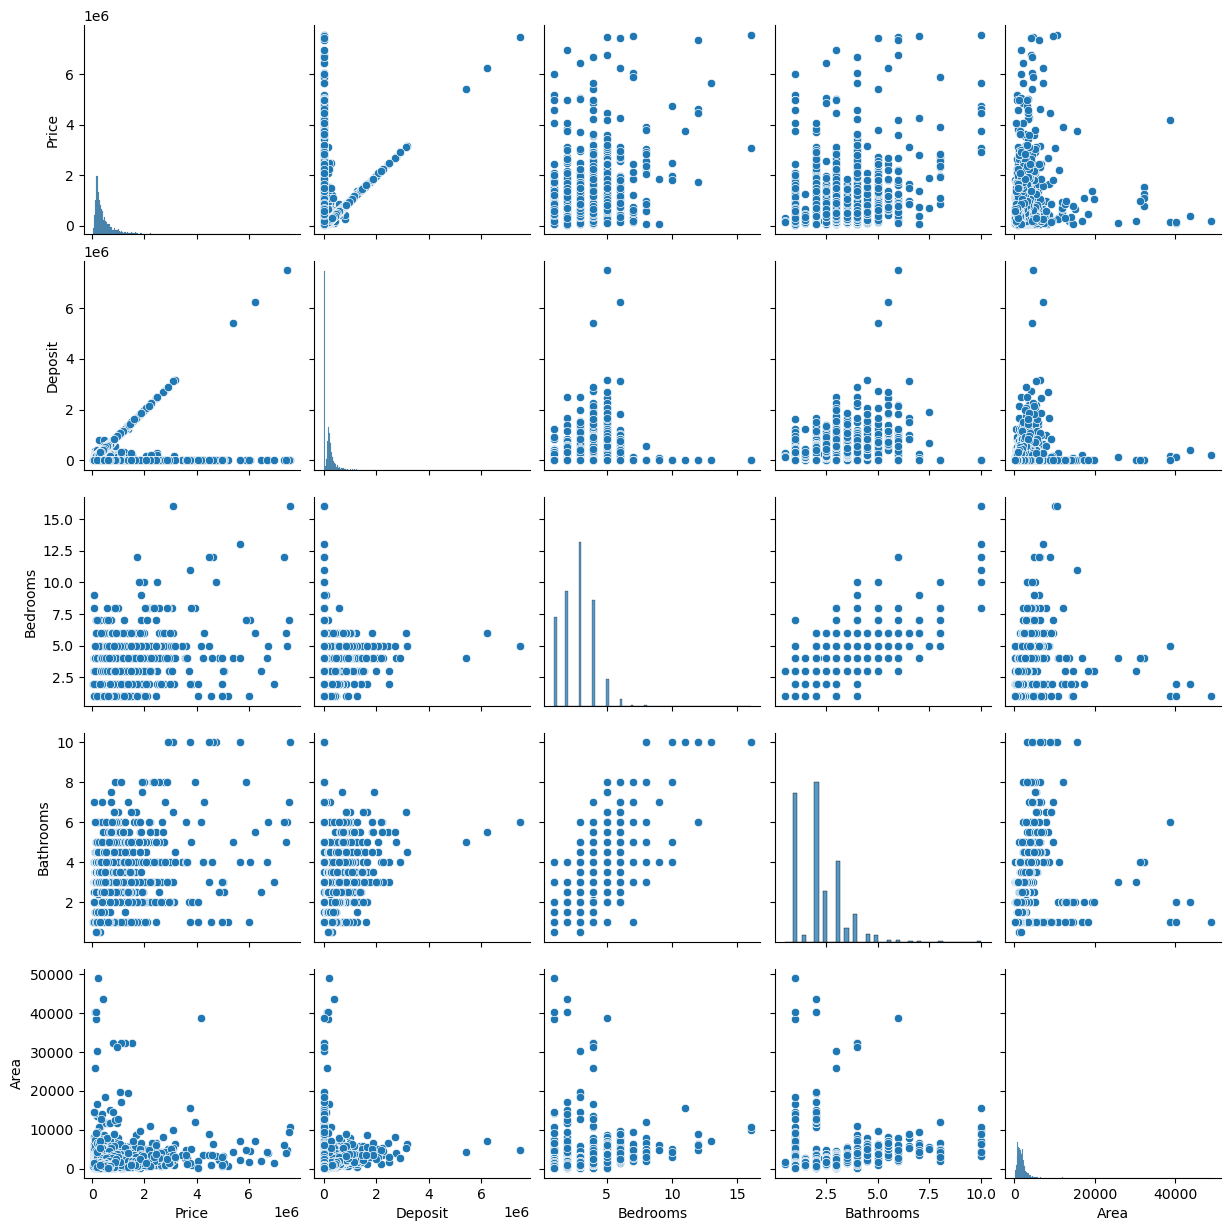

In [117]:
sns.pairplot(df)

### Outliers Detection

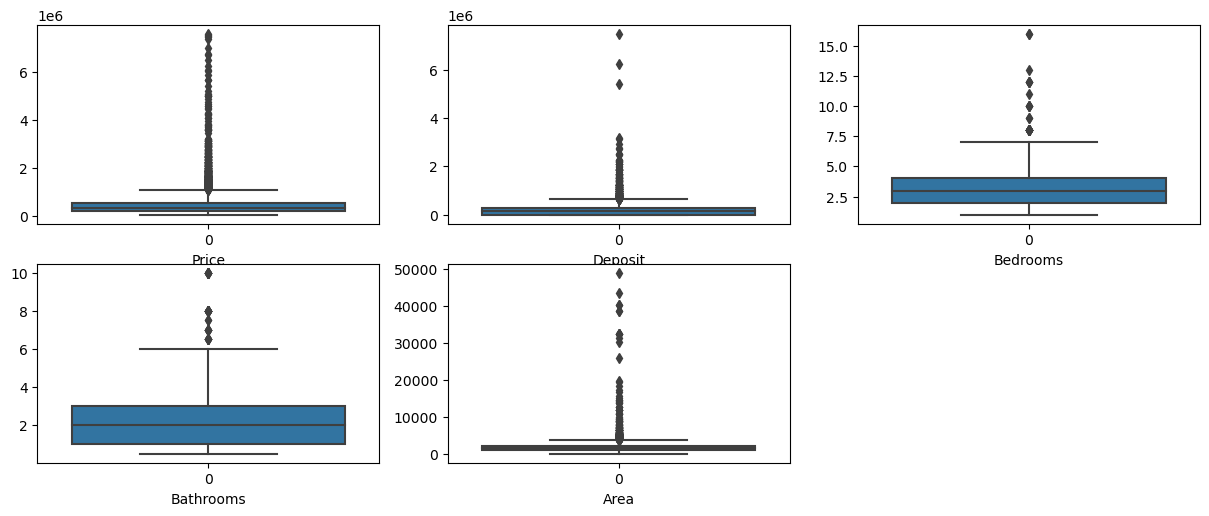

In [83]:
plt.figure(figsize =(15,15), facecolor = 'white')
num = 1
for column in numerical:
    if num <=8:
        plt.subplot(5,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()


We see that Price and Area are target column, so no need to remove outliers from target columns and also categorical columns(includes Bedrooms and Bathrooms). Here we need to remove outliers only from deposit column. 

### Using Z_score Method

In [84]:
z = np.abs(zscore(df['Deposit']))


# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[abs(z) < 3]
df1.shape

(6888, 16)

In [85]:
# checking the data loss for zscore
data_loss_zscore = (6996-6888)/6996*100
print('Dataloss using zscore:',data_loss_zscore)

Dataloss using zscore: 1.5437392795883362


We see that using Z-score method datalosss is just 1.54% which is very less compared to IQR method we will lose 13.9%. So, we consider dataframe after using z_score method. Since to reduce the size of the files some of the steps have been removed after checking the results.

In [86]:
df1

,City,State,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,Austin,TX,280946,280946,2,2.0,1400,Yes,No,No,No,No,No,No,No,No
1,Austin,TX,167237,167237,1,1.0,765,Yes,No,No,No,No,No,No,No,No
2,Austin,TX,312032,312032,2,2.0,1148,Yes,No,No,No,No,No,No,No,No
3,Austin,TX,325997,325997,2,2.0,1030,Yes,No,No,No,No,No,No,No,No
4,Austin,TX,92928,92928,1,1.0,630,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,Sanfrancisco,CA,703195,0,2,2.0,602,Yes,No,Yes,Yes,No,No,No,No,No
6992,Sanfrancisco,CA,458822,0,1,1.0,650,Yes,No,No,Yes,No,Yes,No,No,No
6993,Sanfrancisco,CA,315773,315773,2,1.0,950,No,No,No,Yes,No,No,Yes,Yes,Yes
6994,Sanfrancisco,CA,663298,0,1,1.0,245,Yes,No,Yes,Yes,No,No,No,No,No


### Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = le.fit_transform(df1[i])
df1

,City,State,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,0,8,280946,280946,2,2.0,1400,1,0,0,0,0,0,0,0,0
1,0,8,167237,167237,1,1.0,765,1,0,0,0,0,0,0,0,0
2,0,8,312032,312032,2,2.0,1148,1,0,0,0,0,0,0,0,0
3,0,8,325997,325997,2,2.0,1030,1,0,0,0,0,0,0,0,0
4,0,8,92928,92928,1,1.0,630,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,9,1,703195,0,2,2.0,602,1,0,1,1,0,0,0,0,0
6992,9,1,458822,0,1,1.0,650,1,0,0,1,0,1,0,0,0
6993,9,1,315773,315773,2,1.0,950,0,0,0,1,0,0,1,1,1
6994,9,1,663298,0,1,1.0,245,1,0,1,1,0,0,0,0,0


Now we have converted object data to integer values.

In [88]:
df1.skew()

City              -0.105299
State              0.163088
Price              5.325743
Deposit            1.409738
Bedrooms           1.076599
Bathrooms          1.448769
Area              12.218277
Pets               1.506694
WasherDryer       15.317430
AC                 0.521634
Parking            0.542227
Fireplace          2.778603
Dishwasher         0.601039
Hardwoodfloors     5.027648
Roofdeck           5.960084
storage            7.131170
dtype: float64

Here also we see skewness in most of the features and also target but except Deposit it is not categorical and also target so we will remove skewness from deposit feature only.

In [89]:
df1['Deposit'] = np.cbrt(df1['Deposit'])
df1.skew()

City              -0.105299
State              0.163088
Price              5.325743
Deposit           -0.185510
Bedrooms           1.076599
Bathrooms          1.448769
Area              12.218277
Pets               1.506694
WasherDryer       15.317430
AC                 0.521634
Parking            0.542227
Fireplace          2.778603
Dishwasher         0.601039
Hardwoodfloors     5.027648
Roofdeck           5.960084
storage            7.131170
dtype: float64

We have reduced the skewness from the deposit column. Next we will check for the correlation. 

In [90]:
df1

,City,State,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,0,8,280946,65.494920,2,2.0,1400,1,0,0,0,0,0,0,0,0
1,0,8,167237,55.094823,1,1.0,765,1,0,0,0,0,0,0,0,0
2,0,8,312032,67.826548,2,2.0,1148,1,0,0,0,0,0,0,0,0
3,0,8,325997,68.823676,2,2.0,1030,1,0,0,0,0,0,0,0,0
4,0,8,92928,45.294854,1,1.0,630,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,9,1,703195,0.000000,2,2.0,602,1,0,1,1,0,0,0,0,0
6992,9,1,458822,0.000000,1,1.0,650,1,0,0,1,0,1,0,0,0
6993,9,1,315773,68.096532,2,1.0,950,0,0,0,1,0,0,1,1,1
6994,9,1,663298,0.000000,1,1.0,245,1,0,1,1,0,0,0,0,0


In [91]:
df1.corr()

,City,State,Price,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
City,1.000000,-0.290568,0.137083,-0.390036,-0.158269,-0.156875,-0.031457,0.172856,0.027146,0.190021,0.282514,0.038197,0.234759,-0.027354,-0.054848,0.025197
State,-0.290568,1.000000,-0.064423,0.046677,0.076809,0.076088,0.071225,-0.031924,0.012547,0.026196,-0.078502,-0.049246,-0.021284,0.032862,-0.025388,0.013388
Price,0.137083,-0.064423,1.000000,-0.337133,0.299968,0.375043,0.173668,0.131565,0.041611,0.297735,0.298541,0.168219,0.257147,-0.064646,-0.036605,-0.047388
Deposit,-0.390036,0.046677,-0.337133,1.000000,0.168069,0.152928,0.076551,-0.377275,-0.055181,-0.629337,-0.626211,-0.179613,-0.555719,0.131513,0.130471,0.097285
Bedrooms,-0.158269,0.076809,0.299968,0.168069,1.000000,0.760359,0.371638,-0.107633,-0.005291,-0.016398,-0.008388,0.167925,0.049426,0.001952,0.033228,-0.007246
Bathrooms,-0.156875,0.076088,0.375043,0.152928,0.760359,1.000000,0.385530,-0.089094,0.030778,0.041292,0.036585,0.156497,0.091933,-0.004424,0.042655,-0.026661
Area,-0.031457,0.071225,0.173668,0.076551,0.371638,0.385530,1.000000,-0.053587,-0.003203,0.020470,0.018142,0.105027,0.058945,0.014457,0.018196,-0.011855
Pets,0.172856,-0.031924,0.131565,-0.377275,-0.107633,-0.089094,-0.053587,1.000000,0.023711,0.369720,0.360403,0.105426,0.347216,0.036180,-0.010635,0.065957
WasherDryer,0.027146,0.012547,0.041611,-0.055181,-0.005291,0.030778,-0.003203,0.023711,1.000000,0.060981,0.057117,0.017404,0.087431,-0.012461,-0.010621,0.024258
AC,0.190021,0.026196,0.297735,-0.629337,-0.016398,0.041292,0.020470,0.369720,0.060981,1.000000,0.763146,0.277720,0.678637,0.080815,0.115207,0.002552


In [92]:
df1.corr().sum()

City              0.998365
State             0.794458
Price             2.630388
Deposit          -1.347010
Bedrooms          2.626149
Bathrooms         2.872636
Area              2.213747
Pets              1.942888
WasherDryer       1.296230
AC                3.278758
Parking           3.358417
Fireplace         2.948946
Dishwasher        3.758571
Hardwoodfloors    2.239922
Roofdeck          2.267998
storage           1.839726
dtype: float64

We see that all the columns are positively correlated and Deposit is negatively correlated with features and target.

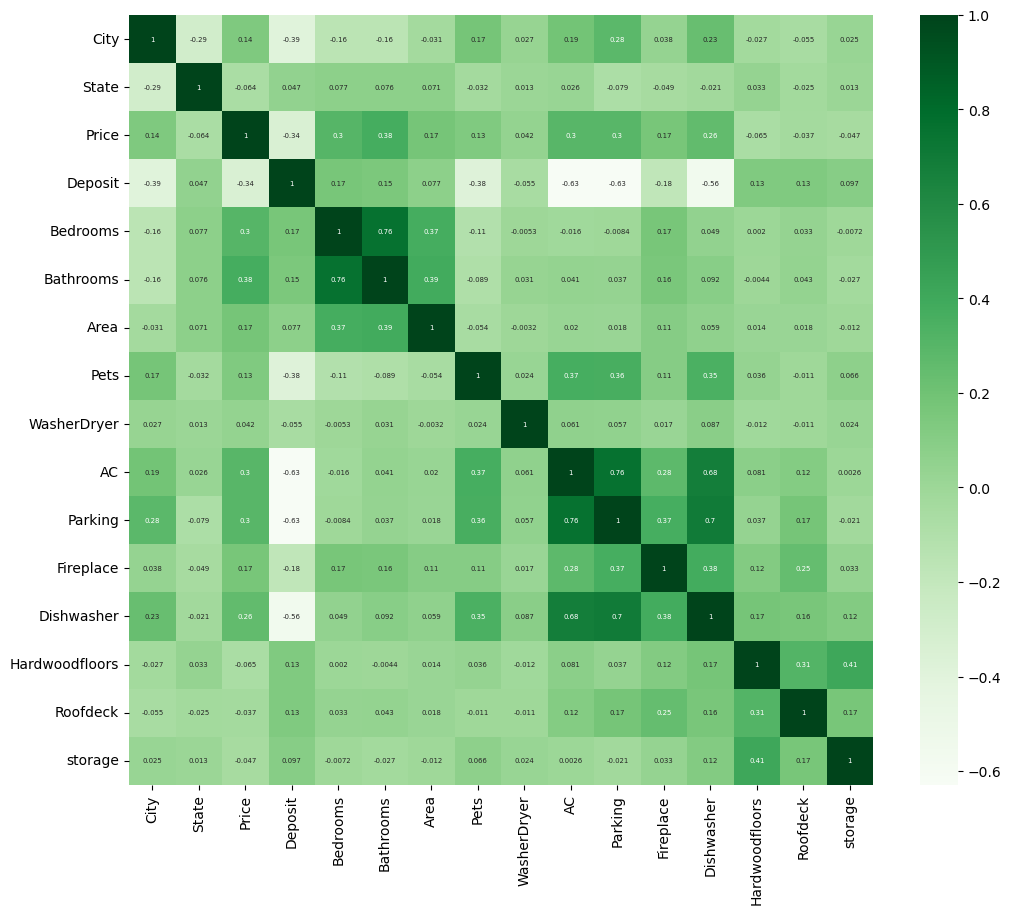

In [94]:
df_corr = df1.corr()

plt.figure(figsize = (12,10))
sns.heatmap(df_corr,annot=True,annot_kws ={'size':5},fmt = ".2g", cmap = 'Greens')
plt.show()

We see that 
1. Bathrooms and Bedroooms are having highest correlation with eachother.
2. AC and Parking are also having highest correlation with eachother.
3. AC and Dishwasher is having 0.68 correlation.
4. Parking and dishwasher is having 0.7 correlation.
5. Deposit is having highest negative correlation with AC, Parking and Dishwasher i.e., -0.47, -0.46 and -0.42.
6. Target Price is having better correlation with Bathrooms, Bedrooms, AC, Parking and Dishwasher compared to other features.
7. Target Area is also having better correlation with Bathrooms and Bedrooms compared to other features.

In [118]:
df1.corr()['Price'].sort_values()

Deposit          -0.337133
Hardwoodfloors   -0.064646
State            -0.064423
storage          -0.047388
Roofdeck         -0.036605
WasherDryer       0.041611
Pets              0.131565
City              0.137083
Fireplace         0.168219
Area              0.173668
Dishwasher        0.257147
AC                0.297735
Parking           0.298541
Bedrooms          0.299968
Bathrooms         0.375043
Price             1.000000
Name: Price, dtype: float64

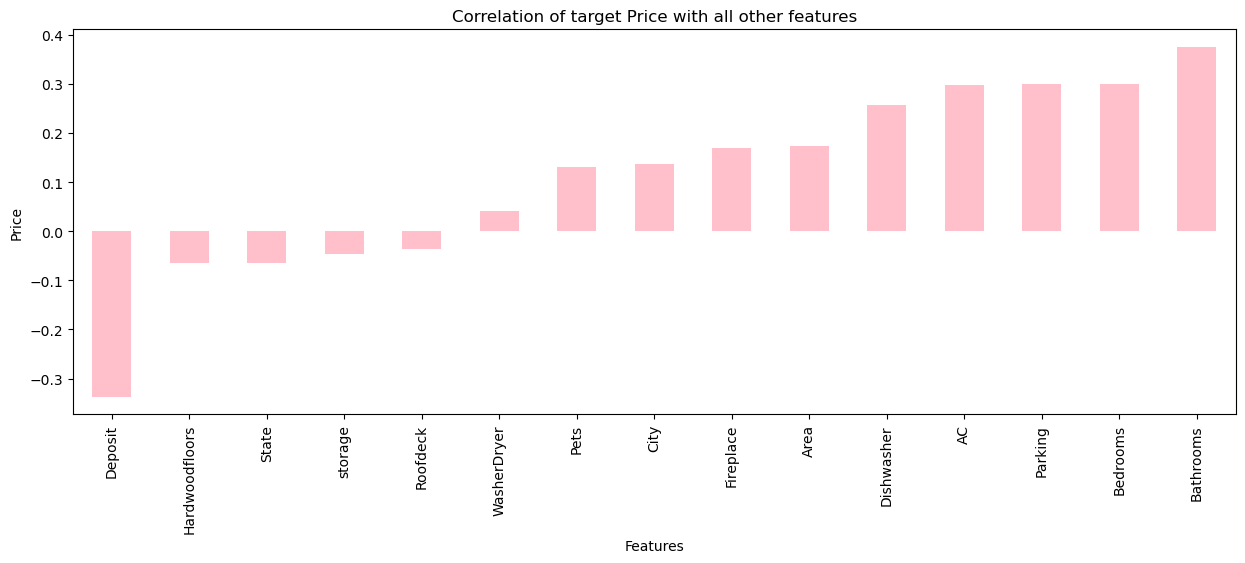

In [95]:
plt.figure(figsize=(15,5))
df1.corr()['Price'].sort_values(ascending=True).drop(['Price']).plot(kind='bar',color='pink')
plt.title('Correlation of target Price with all other features')
plt.xlabel('Features')
plt.ylabel('Price')
plt.show()

We see that Deposit is highly negatively correlated and Bathrooms is highly positively correlated with target Price. Roofdeck is having least negative correlation and washerdryer is having least positive correlation.

In [96]:
df1.corr()['Area'].sort_values()

Pets             -0.053587
City             -0.031457
storage          -0.011855
WasherDryer      -0.003203
Hardwoodfloors    0.014457
Parking           0.018142
Roofdeck          0.018196
AC                0.020470
Dishwasher        0.058945
State             0.071225
Deposit           0.076551
Fireplace         0.105027
Price             0.173668
Bedrooms          0.371638
Bathrooms         0.385530
Area              1.000000
Name: Area, dtype: float64

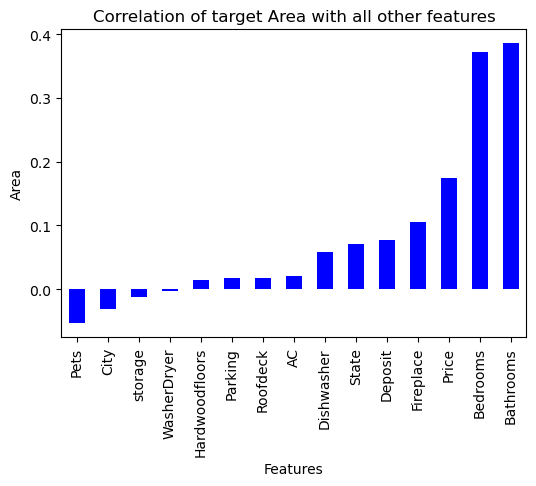

In [100]:
plt.figure(figsize=(6,4))
df1.corr()['Area'].sort_values(ascending=True).drop(['Area']).plot(kind='bar',color='Blue')
plt.title('Correlation of target Area with all other features')
plt.xlabel('Features')
plt.ylabel('Area')
plt.show()

We see that Bathrooms and bedrooms are having highest positive correlation with target Area and Pets is having highest negative correlation with target area. WasherDryer is having least negative correlation and Hardwoodfloors is having least positive correlation with target Area.

In [101]:
df1.shape

(6888, 16)

### Data Splitting

#### Data splitting for predicting Price

In [102]:
# Splitting data in target and dependent feature
X = df1.drop(['Price'], axis =1)
Y = df1['Price']

In [103]:
X.shape, Y.shape

((6888, 15), (6888,))

We have successfully divided our first dataframe (df1) into features (x) and labels (y). Currently, the shape of x consists of 6888 rows and 15 columns, while y contains 6888 rows.

In [104]:
# Splitting data in target and dependent feature
x1 = df1.drop(['Area'], axis =1)
y1 = df1['Area']

In [105]:
x1.shape, y1.shape

((6888, 15), (6888,))

Next, We have divided our dataframe (df1) again into features (x1) and labels (y1) for predicting second target. Currently, the shape of x1 consists of 6888 rows and 15 columns, while y1 contains 6888 rows.

### Feature Scaling

#### Price

In [106]:
sr = StandardScaler()
X = pd.DataFrame(sr.fit_transform(X), columns = X.columns)
X

,City,State,Deposit,Bedrooms,Bathrooms,Area,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,-1.785059,1.448885,0.843508,-0.617686,-0.158670,-0.195033,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
1,-1.785059,1.448885,0.520972,-1.395354,-1.075086,-0.519480,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
2,-1.785059,1.448885,0.915818,-0.617686,-0.158670,-0.323789,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
3,-1.785059,1.448885,0.946742,-0.617686,-0.158670,-0.384080,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
4,-1.785059,1.448885,0.217047,-1.395354,-1.075086,-0.588456,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883,1.426462,-1.002581,-1.187673,-0.617686,-0.158670,-0.602763,2.005096,-0.065023,1.294199,1.307139,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
6884,1.426462,-1.002581,-1.187673,-1.395354,-1.075086,-0.578238,2.005096,-0.065023,-0.772679,1.307139,-0.322526,1.344615,-0.191637,-0.163342,-0.137604
6885,1.426462,-1.002581,0.924191,-0.617686,-1.075086,-0.424956,-0.498729,-0.065023,-0.772679,1.307139,-0.322526,-0.743707,5.218190,6.122128,7.267221
6886,1.426462,-1.002581,-1.187673,-1.395354,-1.075086,-0.785168,2.005096,-0.065023,1.294199,1.307139,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604


### Area

In [107]:
sr = StandardScaler()
x1 = pd.DataFrame(sr.fit_transform(x1), columns = x1.columns)
x1

,City,State,Price,Deposit,Bedrooms,Bathrooms,Pets,WasherDryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,storage
0,-1.785059,1.448885,-0.350424,0.843508,-0.617686,-0.158670,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
1,-1.785059,1.448885,-0.557280,0.520972,-1.395354,-1.075086,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
2,-1.785059,1.448885,-0.293873,0.915818,-0.617686,-0.158670,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
3,-1.785059,1.448885,-0.268468,0.946742,-0.617686,-0.158670,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
4,-1.785059,1.448885,-0.692462,0.217047,-1.395354,-1.075086,2.005096,-0.065023,-0.772679,-0.765030,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883,1.426462,-1.002581,0.417722,-1.187673,-0.617686,-0.158670,2.005096,-0.065023,1.294199,1.307139,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604
6884,1.426462,-1.002581,-0.026836,-1.187673,-1.395354,-1.075086,2.005096,-0.065023,-0.772679,1.307139,-0.322526,1.344615,-0.191637,-0.163342,-0.137604
6885,1.426462,-1.002581,-0.287067,0.924191,-0.617686,-1.075086,-0.498729,-0.065023,-0.772679,1.307139,-0.322526,-0.743707,5.218190,6.122128,7.267221
6886,1.426462,-1.002581,0.345142,-1.187673,-1.395354,-1.075086,2.005096,-0.065023,1.294199,1.307139,-0.322526,-0.743707,-0.191637,-0.163342,-0.137604


We see that our data is standardized using standard scaler method.

### Multicollinearity

### Price

In [108]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF Values,Features
0,1.341678,City
1,1.125709,State
2,2.529526,Deposit
3,2.466142,Bedrooms
4,2.528688,Bathrooms
5,1.207015,Area
6,1.244421,Pets
7,1.012703,WasherDryer
8,2.990853,AC
9,3.243060,Parking


We see that the VIF for the independent features is well below the acceptable threshold of 10

### Area

In [119]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns

vif

,VIF Values,Features
0,1.338728,City
1,1.129126,State
2,1.460384,Price
3,2.705810,Deposit
4,2.440043,Bedrooms
5,2.663800,Bathrooms
6,1.244356,Pets
7,1.012653,WasherDryer
8,2.997176,AC
9,3.244526,Parking


We see that the VIF values are below the threshold range 10

### Model Building

### Price

In [120]:
accuracy = 0
r_state =0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("maximum r2 score is ", accuracy , "at randomstate = ",r_state)

maximum r2 score is  0.41591818656312785 at randomstate =  201


In [121]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size =0.30 , random_state = 201)

In [122]:
x_train.shape

(4821, 15)

In [123]:
x_test.shape

(2067, 15)

In [124]:
y_train.shape

(4821,)

In [125]:
y_test.shape

(2067,)

In [126]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_pred_train = lr.predict(x_train)
lr_r2_train = r2_score(y_train, lr_pred_train)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print("Linear Regression")
print("r2Score of train data is  ",lr_r2_train)
print("r2Score of test data is  ",lr_r2)
print("Mean absolute error of test data is  ", lr_mae)
print("Mean squared error of test data is  ", lr_mse)
print("Root Mean squared error of test data is  ", lr_rmse)
print("\n\n")


ls = Lasso()
ls.fit(x_train,y_train)
ls_pred = ls.predict(x_test)
ls_pred_train = ls.predict(x_train)
ls_r2_train = r2_score(y_train, ls_pred_train)
ls_r2 = r2_score(y_test, ls_pred)
ls_mae = mean_absolute_error(y_test, ls_pred)
ls_mse = mean_squared_error(y_test, ls_pred)
ls_rmse = np.sqrt(mean_squared_error(y_test, ls_pred))
print("Lasso Regression")
print("r2Score of train data is  ",ls_r2_train)
print("r2Score of test data is  ",ls_r2)
print("Mean absolute error of test data is  ", ls_mae)
print("Mean squared error of test data is  ", ls_mse)
print("Root Mean squared error of test data is  ", ls_rmse)
print("\n\n")

rg = Ridge()
rg.fit(x_train,y_train)
rg_pred = rg.predict(x_test)
rg_pred_train = rg.predict(x_train)
rg_r2_train = r2_score(y_train, rg_pred_train)
rg_r2 = r2_score(y_test, rg_pred)
rg_mae = mean_absolute_error(y_test, rg_pred)
rg_mse = mean_squared_error(y_test, rg_pred)
rg_rmse = np.sqrt(mean_squared_error(y_test, rg_pred))
print("Ridge Regression")
print("r2Score of train data is  ",rg_r2_train)
print("r2Score of test data is  ",rg_r2)
print("Mean absolute error of test data is  ", rg_mae)
print("Mean squared error of test data is  ", rg_mse)
print("Root Mean squared error of test data is  ", rg_rmse)
print("\n\n")

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
gbr_pred_train = gbr.predict(x_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
print("Gradient Boosting Regressor")
print("r2Score of train data is  ",gbr_r2_train)
print("r2Score of test data is  ",gbr_r2)
print("Mean absolute error of test data is  ", gbr_mae)
print("Mean squared error of test data is  ", gbr_mse)
print("Root Mean squared error of test data is  ", gbr_rmse)
print("\n\n")


xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_pred_train = xgb.predict(x_train)
xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print("XGBRegressor")
print("r2Score of train data is  ",xgb_r2_train)
print("r2Score of test data is  ",xgb_r2)
print("Mean absolute error of test data is  ", xgb_mae)
print("Mean squared error of test data is  ", xgb_mse)
print("Root Mean squared error of test data is  ", xgb_rmse)
print("\n\n")

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred = abr.predict(x_test)
abr_pred_train = abr.predict(x_train)
abr_r2_train = r2_score(y_train, abr_pred_train)
abr_r2 = r2_score(y_test, abr_pred)
abr_mae = mean_absolute_error(y_test, abr_pred)
abr_mse = mean_squared_error(y_test, abr_pred)
abr_rmse = np.sqrt(mean_squared_error(y_test, abr_pred))
print("Ada Boosting Regressor")
print("r2Score of train data is  ",abr_r2_train)
print("r2Score of test data is  ",abr_r2)
print("Mean absolute error of test data is  ", abr_mae)
print("Mean squared error of test data is  ", abr_mse)
print("Root Mean squared error of test data is  ", abr_rmse)
print("\n\n")


br = BaggingRegressor()
br.fit(x_train,y_train)
br_pred = br.predict(x_test)
br_pred_train = br.predict(x_train)
br_r2_train = r2_score(y_train, br_pred_train)
br_r2 = r2_score(y_test, br_pred)
br_mae = mean_absolute_error(y_test, br_pred)
br_mse = mean_squared_error(y_test, br_pred)
br_rmse = np.sqrt(mean_squared_error(y_test, br_pred))
print("Bagging Regressor")
print("r2Score of train data is  ",br_r2_train)
print("r2Score of test data is  ",br_r2)
print("Mean absolute error of test data is  ", br_mae)
print("Mean squared error of test data is  ", br_mse)
print("Root Mean squared error of test data is  ", br_rmse)
print("\n\n")


rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)
rfr_r2_train = r2_score(y_train, rfr_pred_train)
rfr_r2 = r2_score(y_test, rfr_pred)
rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print("Random Forest Regressor")
print("r2Score of train data is  ",rfr_r2_train)
print("r2Score of test data is  ",rfr_r2)
print("Mean absolute error of test data is  ", rfr_mae)
print("Mean squared error of test data is  ", rfr_mse)
print("Root Mean squared error of test data is  ", rfr_rmse)
print("\n\n")

etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred = etr.predict(x_test)
etr_pred_train = etr.predict(x_train)
etr_r2_train = r2_score(y_train, etr_pred_train)
etr_r2 = r2_score(y_test, etr_pred)
etr_mae = mean_absolute_error(y_test, etr_pred)
etr_mse = mean_squared_error(y_test, etr_pred)
etr_rmse = np.sqrt(mean_squared_error(y_test, etr_pred))
print("Extra Trees Regressor")
print("r2Score of train data is  ",etr_r2_train)
print("r2Score of test data is  ",etr_r2)
print("Mean absolute error of test data is  ", etr_mae)
print("Mean squared error of test data is  ", etr_mse)
print("Root Mean squared error of test data is  ", etr_rmse)
print("\n\n")

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)
dtr_pred_train = dtr.predict(x_train)
dtr_r2_train = r2_score(y_train, dtr_pred_train)
dtr_r2 = r2_score(y_test, dtr_pred)
dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
print("Decision Tree Regressor")
print("r2Score of train data is  ",dtr_r2_train)
print("r2Score of test data is  ",dtr_r2)
print("Mean absolute error of test data is  ", dtr_mae)
print("Mean squared error of test data is  ", dtr_mse)
print("Root Mean squared error of test data is  ", dtr_rmse)
print("\n\n")

knn = KNN()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
knn_r2_train = r2_score(y_train, knn_pred_train)
knn_r2 = r2_score(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
print("K-Nearest Neighbor")
print("r2Score of train data is  ",knn_r2_train)
print("r2Score of test data is  ",knn_r2)
print("Mean absolute error of test data is  ", knn_mae)
print("Mean squared error of test data is  ", knn_mse)
print("Root Mean squared error of test data is  ", knn_rmse)
print("\n\n")


svr = SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_pred_train = svr.predict(x_train)
svr_r2_train = r2_score(y_train, svr_pred_train)
svr_r2 = r2_score(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
print("Super Vector Regressor")
print("r2Score of train data is  ",svr_r2_train)
print("r2Score of test data is  ",svr_r2)
print("Mean absolute error of test data is  ", svr_mae)
print("Mean squared error of test data is  ", svr_mse)
print("Root Mean squared error of test data is  ", svr_rmse)
print("\n\n")

Linear Regression
r2Score of train data is   0.2858709876002906
r2Score of test data is   0.41591818656312785
Mean absolute error of test data is   237743.65191920454
Mean squared error of test data is   134396124340.47702
Root Mean squared error of test data is   366600.7696943325



Lasso Regression
r2Score of train data is   0.28587098753795037
r2Score of test data is   0.41591835829947066
Mean absolute error of test data is   237743.11739501523
Mean squared error of test data is   134396084824.26825
Root Mean squared error of test data is   366600.71579890326



Ridge Regression
r2Score of train data is   0.2858709593413521
r2Score of test data is   0.41593623773614463
Mean absolute error of test data is   237724.90306523582
Mean squared error of test data is   134391970799.59038
Root Mean squared error of test data is   366595.1047130749



Gradient Boosting Regressor
r2Score of train data is   0.5902356429309162
r2Score of test data is   0.6361765017338202
Mean absolute error of 

In [127]:
accuracy_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','XGBRegressor','AdaBoostRegressor','Bagging Regressor','ExtraTreesRegressor','RandomForest','DecisionTree', 'Knn','svr'],
                          'r-square_train':[lr_r2_train, ls_r2_train,rg_r2_train,gbr_r2_train,xgb_r2_train,abr_r2_train, br_r2_train, etr_r2_train, rfr_r2_train, dtr_r2_train,knn_r2_train,svr_r2_train],
                          'r-square_test':[lr_r2, ls_r2,rg_r2,gbr_r2,xgb_r2, abr_r2,br_r2, etr_r2, rfr_r2, dtr_r2,knn_r2,svr_r2],    
                          'mae_score':[lr_mae, ls_mae,rg_mae,gbr_mae,xgb_mae, abr_mae,br_mae, etr_mae, rfr_mae, dtr_mae,knn_mae,svr_mae],
                          'mse_score':[lr_mse, ls_mse,rg_mse,gbr_mse,xgb_mse,abr_mse,br_mse,etr_mse,rfr_mse, dtr_mse,knn_mse,svr_mse],
                          'rmse_score':[lr_rmse, ls_rmse,rg_rmse,gbr_rmse,xgb_rmse,abr_rmse,br_rmse,etr_rmse,rfr_rmse,dtr_rmse,knn_rmse,svr_rmse]})
accuracy_data

,Models,r-square_train,r-square_test,mae_score,mse_score,rmse_score
0,Linear,0.285871,0.415918,237743.651919,1.343961e+11,366600.769694
1,Lasso,0.285871,0.415918,237743.117395,1.343961e+11,366600.715799
2,Ridge,0.285871,0.415936,237724.903065,1.343920e+11,366595.104713
3,GradientBoosting,0.590236,0.636177,144755.789515,8.371510e+10,289335.620315
4,XGBRegressor,0.906322,0.473409,156413.253030,1.211676e+11,348091.351177
5,AdaBoostRegressor,0.313242,0.303662,230320.897033,1.602260e+11,400282.379155
6,Bagging Regressor,0.886239,0.515316,141075.384510,1.115249e+11,333953.462509
7,ExtraTreesRegressor,0.990962,0.318700,154976.081462,1.567658e+11,395936.597826
8,RandomForest,0.913933,0.543490,134170.871713,1.050421e+11,324101.916188
9,DecisionTree,0.990962,-0.045806,173669.099862,2.406380e+11,490548.661260


We see that from the above dataframe there is better r2 score for Gradient Boosting Regressor, XGB Regressor and Random Forest Models But Gradient Boosting regressor has less error score like MAE, MSE and RMSE compared to all other models. So we will check for the cross validation score for better understanding and then confirm which model is working better for the price predictions.

### Cross Validation Score

In [128]:
#linear Regression
lr_score = cross_val_score(lr, X, Y, cv=5)
print("Linear Regression")
print(lr_score)
lr_mean = np.mean(lr_score)
print(lr_mean)
lr_diff = (lr_r2 - lr_score.mean())
print(lr_diff)
print("\n")

#Lasso Regression
ls_score = cross_val_score(ls, X, Y, cv=5)
print("Lasso Regression")
print(ls_score)
ls_mean = np.mean(ls_score)
print(ls_mean)
ls_diff = (ls_r2 - ls_score.mean())
print(ls_diff)
print("\n")

#Ridge Regression
rg_score = cross_val_score(rg, X, Y, cv=5)
print("Ridge Regression")
print(rg_score)
rg_mean = np.mean(rg_score)
print(rg_mean)
rg_diff = (rg_r2 - rg_score.mean())
print(rg_diff)
print("\n")

#Gradient Boosting Regression
gbr_score = cross_val_score(gbr, X, Y, cv=5)
print("Gradient Boosting Regression")
print(gbr_score)
gbr_mean = np.mean(gbr_score)
print(gbr_mean)
gbr_diff = (gbr_r2 - gbr_score.mean())
print(gbr_diff)
print("\n")

#Gradient Boosting Regression
xgb_score = cross_val_score(xgb, X, Y, cv=5)
print("XGBRegression")
print(xgb_score)
xgb_mean = np.mean(xgb_score)
print(xgb_mean)
xgb_diff = (xgb_r2 - xgb_score.mean())
print(xgb_diff)
print("\n")

#AdaBoost Regression
abr_score = cross_val_score(abr, X, Y, cv=5)
print("Ada Boosting Regression")
print(abr_score)
abr_mean = np.mean(abr_score)
print(abr_mean)
abr_diff = (abr_r2 - abr_score.mean())
print(abr_diff)
print("\n")

#Bagging Regression
br_score = cross_val_score(br, X, Y, cv=5)
print("Baggging Regression")
print(br_score)
br_mean = np.mean(br_score)
print(br_mean)
br_diff = (br_r2 - br_score.mean())
print(br_diff)
print("\n")

#Extra Trees Regression
etr_score = cross_val_score(etr, X, Y, cv=5)
print("Extra Trees Regression")
print(etr_score)
etr_mean = np.mean(etr_score)
print(etr_mean)
etr_diff = (etr_r2 - etr_score.mean())
print(etr_diff)
print("\n")

#Random Forest Regression
rfr_score = cross_val_score(rfr, X, Y, cv=5)
print("Random forest Regression")
print(rfr_score)
rfr_mean = np.mean(rfr_score)
print(rfr_mean)
rfr_diff = (rfr_r2 - rfr_score.mean())
print(rfr_diff)
print("\n")

#Decision trees Regression
dtr_score = cross_val_score(dtr, X, Y, cv=5)
print("Decision trees Regression")
print(dtr_score)
dtr_mean = np.mean(dtr_score)
print(dtr_mean)
dtr_diff = (dtr_r2 - dtr_score.mean())
print(dtr_diff)
print("\n")

#KNN Regression
knn_score = cross_val_score(knn,X, Y, cv=5)
print("KNN Regression")
print(knn_score)
knn_mean = np.mean(knn_score)
print(knn_mean)
knn_diff = (knn_r2 - knn_score.mean())
print(knn_diff)
print("\n")

#Super Vector Regression
svr_score = cross_val_score(svr, X, Y, cv=5)
print("Super Vector Regression")
print(svr_score)
svr_mean = np.mean(svr_score)
print(svr_mean)
svr_diff = (svr_r2 - svr_score.mean())
print(svr_diff)
print("\n")

Linear Regression
[-0.48232104 -0.06197524 -0.23110151  0.36141879  0.22759971]
-0.037275855717171916
0.45319404228029975


Lasso Regression
[-0.4822975  -0.06196836 -0.23108572  0.36141686  0.22760538]
-0.03726586642543779
0.45318422472490844


Ridge Regression
[-0.48190703 -0.06172928 -0.23082129  0.36137799  0.22763   ]
-0.037089921003192285
0.45302615873933694


Gradient Boosting Regression
[0.11558061 0.59156705 0.12291913 0.48831566 0.35254987]
0.33418646377041583
0.3019900379634044


XGBRegression
[-0.24166408  0.33866826 -0.67183176  0.51424475  0.1647812 ]
0.020839673570340177
0.45256936019078103


Ada Boosting Regression
[-0.72283791 -0.27049479 -1.30458254  0.40820889  0.00331266]
-0.3772787397702032
0.6809410796945052


Baggging Regression
[ 0.07960146  0.30068686 -0.59946815  0.47556581  0.33924123]
0.11912544298060594
0.3961903818806926


Extra Trees Regression
[-0.01347151  0.37401326 -0.5985796   0.47839508  0.29975961]
0.10802336646109707
0.2106768783252882


Random fo

In [129]:
Cross_val_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','XGB Regressor','Ada Boost','Bagging Regressor','ExtraTrees Regressor','RandomForest','DecisionTree', 'Knn','svr'],
                                'r-square_train':[lr_r2_train, ls_r2_train,rg_r2_train,gbr_r2_train,xgb_r2_train,abr_r2_train,br_r2_train, etr_r2_train, rfr_r2_train, dtr_r2_train,knn_r2_train,svr_r2_train],
                               'r-square_test':[lr_r2, ls_r2,rg_r2,gbr_r2,xgb_r2,abr_r2,br_r2, etr_r2, rfr_r2, dtr_r2,knn_r2,svr_r2], 
                               'CV_mean':[lr_mean, ls_mean,rg_mean,gbr_mean,xgb_mean,abr_mean,br_mean, etr_mean, rfr_mean, dtr_mean,knn_mean,svr_mean], 
                              'diff_cv_r2':[lr_diff, ls_diff,rg_diff,gbr_diff,xgb_diff,abr_diff,br_diff,etr_diff,rfr_diff, dtr_diff,knn_diff,svr_diff]})
Cross_val_data

,Models,r-square_train,r-square_test,CV_mean,diff_cv_r2
0,Linear,0.285871,0.415918,-0.037276,0.453194
1,Lasso,0.285871,0.415918,-0.037266,0.453184
2,Ridge,0.285871,0.415936,-0.037090,0.453026
3,GradientBoosting,0.590236,0.636177,0.334186,0.301990
4,XGB Regressor,0.906322,0.473409,0.020840,0.452569
5,Ada Boost,0.313242,0.303662,-0.377279,0.680941
6,Bagging Regressor,0.886239,0.515316,0.119125,0.396190
7,ExtraTrees Regressor,0.990962,0.318700,0.108023,0.210677
8,RandomForest,0.913933,0.543490,0.076587,0.466903
9,DecisionTree,0.990962,-0.045806,-1.130644,1.084838


From the above dataframe we observe that the difference of cv score with r2 score of test data is comparitively less in all the models but Gradient boost regressor is giving very least difference and better r2 and less error score.  So next we will tune the parameters of Gradient Boosting Model and will check whether we can increase the model performance.

### Hyper-Parameter Tuning of Gradient Boosting Model for Price Prediction 

In [155]:
param_grid_gbr = {"n_estimators": [50,70,90,120], "learning_rate" :[0.2,0.01, 0.1], 
                  "max_depth":[1,2,3,4,5,6,7,8,9],"criterion":['friedman_mse','squared_error'],"max_features":['sqrt','log2']}

In [156]:
gd_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5)
gd_gbr.fit(x_train,y_train)


best_parameters=gd_gbr.best_params_
print(best_parameters)
best_result=gd_gbr.best_score_
print(best_result*100)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 70}
47.722195253759985


In [283]:
Price1 = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, max_depth=7, max_features='log2', n_estimators=67)

In [284]:
Price1.fit(x_train,y_train)
Price1_pred = Price1.predict(x_test)
Price1_r2 = r2_score(y_test, Price1_pred)
Price1_mae = mean_absolute_error(y_test, Price1_pred)
Price1_mse = mean_squared_error(y_test, Price1_pred)
Price1_rmse = np.sqrt(mean_squared_error(y_test, Price1_pred))

print("r2Score of test data is  ",Price1_r2)
print("Mean absolute error of test data is  ", Price1_mae)
print("Mean squared error of test data is  ", Price1_mse)
print("Root Mean squared error of test data is  ",Price1_rmse)
print("\n")

r2Score of test data is   0.6460457283896722
Mean absolute error of test data is   136641.65810591442
Mean squared error of test data is   81444210731.83438
Root Mean squared error of test data is   285384.32110372564




#### We see that after tuning the parameters{criterion= 'friedman_mse', learning_rate= 0.1, max_depth= 5,max_features='log2', n_estimators= 70}, we got the r2 score which has reduced to 60% where as before it was 63%.
### So tried to change the parameters and check for the increase in r2 score so tested with parameters{criterion='squared_error', learning_rate=0.1, max_depth=7, max_features='log2', n_estimators=67}. We see that there is slight increase in r2 score i.e., 64.60% and reduced in MAE, MSE errors. So we consider Gradient Boosting Regressor as best and accurate model

### Save The Model

In [293]:
joblib.dump(Price1,"Rental_price.pkl")

['Rental_price.pkl']

In [294]:
#predicting 
model = joblib.load("Rental_price.pkl")
result = model.score(x_test,y_test)
print(result)

0.6460457283896722


,Actual,Predicted
946,265984,291767.280354
2609,232736,230421.071045
5522,773016,665181.156518
125,187020,269015.781806
6099,945074,550027.758731
...,...,...
976,191176,234205.757137
5420,157928,178852.614884
2243,315440,275934.880785
6459,440536,429327.721152


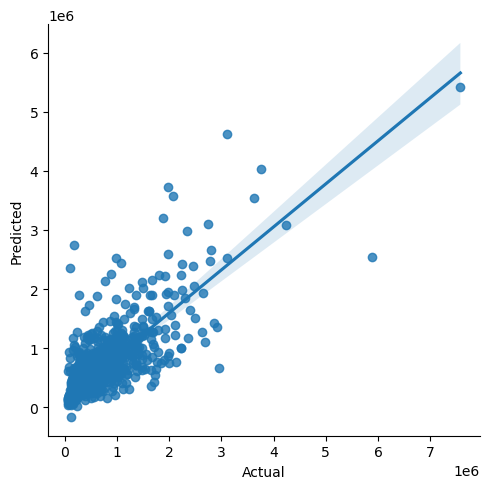

In [295]:
#create dataframe comparing 
comparision = pd.DataFrame({'Actual':y_test , 'Predicted':Price1_pred},columns=['Actual','Predicted'])
sns.lmplot(x='Actual',y='Predicted', data=comparision)
comparision.head(100)

### Area Prediction

In [297]:
accuracy = 0
r_state =0
for i in range(1,1000):
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train_1,y_train_1)
    y_pred_1 = lr.predict(x_test_1)
    acc = r2_score(y_test_1,y_pred_1)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("maximum r2 score is ", accuracy , "at randomstate = ",r_state)

maximum r2 score is  0.44015128082818666 at randomstate =  236


In [298]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x1, y1, test_size = 0.30, random_state =236)

In [299]:
x_train_1.shape, y_train_1.shape

((4821, 15), (4821,))

In [300]:
x_test_1.shape, y_test_1.shape

((2067, 15), (2067,))

In [301]:
lr = LinearRegression()
lr.fit(x_train_1,y_train_1)
lr_pred = lr.predict(x_test_1)
lr_pred_train = lr.predict(x_train_1)
lr_r2_train = r2_score(y_train_1, lr_pred_train)
lr_r2 = r2_score(y_test_1, lr_pred)
lr_mae = mean_absolute_error(y_test_1, lr_pred)
lr_mse = mean_squared_error(y_test_1, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test_1, lr_pred))
print("Linear Regression")
print("r2Score of train data is  ",lr_r2_train)
print("r2Score of test data is  ",lr_r2)
print("Mean absolute error of test data is  ", lr_mae)
print("Mean squared error of test data is  ", lr_mse)
print("Root Mean squared error of test data is  ", lr_rmse)
print("\n\n")


ls = Lasso()
ls.fit(x_train_1,y_train_1)
ls_pred = ls.predict(x_test_1)
ls_pred_train = ls.predict(x_train_1)
ls_r2_train = r2_score(y_train_1, ls_pred_train)
ls_r2 = r2_score(y_test_1, ls_pred)
ls_mae = mean_absolute_error(y_test_1, ls_pred)
ls_mse = mean_squared_error(y_test_1, ls_pred)
ls_rmse = np.sqrt(mean_squared_error(y_test_1, ls_pred))
print("Lasso Regression")
print("r2Score of train data is  ",ls_r2_train)
print("r2Score of test data is  ",ls_r2)
print("Mean absolute error of test data is  ", ls_mae)
print("Mean squared error of test data is  ", ls_mse)
print("Root Mean squared error of test data is  ", ls_rmse)
print("\n\n")

rg = Ridge()
rg.fit(x_train_1,y_train_1)
rg_pred = rg.predict(x_test_1)
rg_pred_train = rg.predict(x_train_1)
rg_r2_train = r2_score(y_train_1, rg_pred_train)
rg_r2 = r2_score(y_test_1, rg_pred)
rg_mae = mean_absolute_error(y_test_1, rg_pred)
rg_mse = mean_squared_error(y_test_1, rg_pred)
rg_rmse = np.sqrt(mean_squared_error(y_test_1, rg_pred))
print("Ridge Regression")
print("r2Score of train data is  ",rg_r2_train)
print("r2Score of test data is  ",rg_r2)
print("Mean absolute error of test data is  ", rg_mae)
print("Mean squared error of test data is  ", rg_mse)
print("Root Mean squared error of test data is  ", rg_rmse)
print("\n\n")

gbr = GradientBoostingRegressor()
gbr.fit(x_train_1,y_train_1)
gbr_pred = gbr.predict(x_test_1)
gbr_pred_train = gbr.predict(x_train_1)
gbr_r2_train = r2_score(y_train_1, gbr_pred_train)
gbr_r2 = r2_score(y_test_1, gbr_pred)
gbr_mae = mean_absolute_error(y_test_1, gbr_pred)
gbr_mse = mean_squared_error(y_test_1, gbr_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test_1, gbr_pred))
print("Gradient Boosting Regressor")
print("r2Score of train data is  ",gbr_r2_train)
print("r2Score of test data is  ",gbr_r2)
print("Mean absolute error of test data is  ", gbr_mae)
print("Mean squared error of test data is  ", gbr_mse)
print("Root Mean squared error of test data is  ", gbr_rmse)
print("\n\n")

xgb = XGBRegressor()
xgb.fit(x_train_1,y_train_1)
xgb_pred = xgb.predict(x_test_1)
xgb_pred_train = xgb.predict(x_train_1)
xgb_r2_train = r2_score(y_train_1, xgb_pred_train)
xgb_r2 = r2_score(y_test_1, xgb_pred)
xgb_mae = mean_absolute_error(y_test_1, xgb_pred)
xgb_mse = mean_squared_error(y_test_1, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test_1, xgb_pred))
print("XGBRegressor")
print("r2Score of train data is  ",xgb_r2_train)
print("r2Score of test data is  ",xgb_r2)
print("Mean absolute error of test data is  ", xgb_mae)
print("Mean squared error of test data is  ", xgb_mse)
print("Root Mean squared error of test data is  ", xgb_rmse)
print("\n\n")

abr = AdaBoostRegressor()
abr.fit(x_train_1,y_train_1)
abr_pred = abr.predict(x_test_1)
abr_pred_train = abr.predict(x_train_1)
abr_r2_train = r2_score(y_train_1, abr_pred_train)
abr_r2 = r2_score(y_test_1, abr_pred)
abr_mae = mean_absolute_error(y_test_1, abr_pred)
abr_mse = mean_squared_error(y_test_1, abr_pred)
abr_rmse = np.sqrt(mean_squared_error(y_test_1, abr_pred))
print("Ada Boosting Regressor")
print("r2Score of train data is  ",abr_r2_train)
print("r2Score of test data is  ",abr_r2)
print("Mean absolute error of test data is  ", abr_mae)
print("Mean squared error of test data is  ", abr_mse)
print("Root Mean squared error of test data is  ", abr_rmse)
print("\n\n")

br = BaggingRegressor()
br.fit(x_train_1,y_train_1)
br_pred = br.predict(x_test_1)
br_pred_train = br.predict(x_train_1)
br_r2_train = r2_score(y_train_1, br_pred_train)
br_r2 = r2_score(y_test_1, br_pred)
br_mae = mean_absolute_error(y_test_1, br_pred)
br_mse = mean_squared_error(y_test_1, br_pred)
br_rmse = np.sqrt(mean_squared_error(y_test_1, br_pred))
print("Bagging Regressor")
print("r2Score of train data is  ",br_r2_train)
print("r2Score of test data is  ",br_r2)
print("Mean absolute error of test data is  ", br_mae)
print("Mean squared error of test data is  ", br_mse)
print("Root Mean squared error of test data is  ", br_rmse)
print("\n\n")

rfr = RandomForestRegressor()
rfr.fit(x_train_1,y_train_1)
rfr_pred = rfr.predict(x_test_1)
rfr_pred_train = rfr.predict(x_train_1)
rfr_r2_train = r2_score(y_train_1, rfr_pred_train)
rfr_r2 = r2_score(y_test_1, rfr_pred)
rfr_mae = mean_absolute_error(y_test_1, rfr_pred)
rfr_mse = mean_squared_error(y_test_1, rfr_pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test_1, rfr_pred))
print("Random Forest Regressor")
print("r2Score of train data is  ",rfr_r2_train)
print("r2Score of test data is  ",rfr_r2)
print("Mean absolute error of test data is  ", rfr_mae)
print("Mean squared error of test data is  ", rfr_mse)
print("Root Mean squared error of test data is  ", rfr_rmse)
print("\n\n")

etr = ExtraTreesRegressor()
etr.fit(x_train_1,y_train_1)
etr_pred = etr.predict(x_test_1)
etr_pred_train = etr.predict(x_train_1)
etr_r2_train = r2_score(y_train_1, etr_pred_train)
etr_r2 = r2_score(y_test_1, etr_pred)
etr_mae = mean_absolute_error(y_test_1, etr_pred)
etr_mse = mean_squared_error(y_test_1, etr_pred)
etr_rmse = np.sqrt(mean_squared_error(y_test_1, etr_pred))
print("Extra Trees Regressor")
print("r2Score of train data is  ",etr_r2_train)
print("r2Score of test data is  ",etr_r2)
print("Mean absolute error of test data is  ", etr_mae)
print("Mean squared error of test data is  ", etr_mse)
print("Root Mean squared error of test data is  ", etr_rmse)
print("\n\n")

dtr = DecisionTreeRegressor()
dtr.fit(x_train_1,y_train_1)
dtr_pred = dtr.predict(x_test_1)
dtr_pred_train = dtr.predict(x_train_1)
dtr_r2_train = r2_score(y_train_1, dtr_pred_train)
dtr_r2 = r2_score(y_test_1, dtr_pred)
dtr_mae = mean_absolute_error(y_test_1, dtr_pred)
dtr_mse = mean_squared_error(y_test_1, dtr_pred)
dtr_rmse = np.sqrt(mean_squared_error(y_test_1, dtr_pred))
print("Decision Tree Regressor")
print("r2Score of train data is  ",dtr_r2_train)
print("r2Score of test data is  ",dtr_r2)
print("Mean absolute error of test data is  ", dtr_mae)
print("Mean squared error of test data is  ", dtr_mse)
print("Root Mean squared error of test data is  ", dtr_rmse)
print("\n\n")

knn = KNN()
knn.fit(x_train_1,y_train_1)
knn_pred = knn.predict(x_test_1)
knn_pred_train = knn.predict(x_train_1)
knn_r2_train = r2_score(y_train_1, knn_pred_train)
knn_r2 = r2_score(y_test_1, knn_pred)
knn_mae = mean_absolute_error(y_test_1, knn_pred)
knn_mse = mean_squared_error(y_test_1, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test_1, knn_pred))
print("K-Nearest Neighbor")
print("r2Score of train data is  ",knn_r2_train)
print("r2Score of test data is  ",knn_r2)
print("Mean absolute error of test data is  ", knn_mae)
print("Mean squared error of test data is  ", knn_mse)
print("Root Mean squared error of test data is  ", knn_rmse)
print("\n\n")


svr = SVR()
svr.fit(x_train_1,y_train_1)
svr_pred = svr.predict(x_test_1)
svr_pred_train = svr.predict(x_train_1)
svr_r2_train = r2_score(y_train_1, svr_pred_train)
svr_r2 = r2_score(y_test_1, svr_pred)
svr_mae = mean_absolute_error(y_test_1, svr_pred)
svr_mse = mean_squared_error(y_test_1, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test_1, svr_pred))
print("Super Vector Regressor")
print("r2Score of train data is  ",svr_r2_train)
print("r2Score of test data is  ",svr_r2)
print("Mean absolute error of test data is  ", svr_mae)
print("Mean squared error of test data is  ", svr_mse)
print("Root Mean squared error of test data is  ", svr_rmse)
print("\n\n")

Linear Regression
r2Score of train data is   0.14242600725784238
r2Score of test data is   0.44015128082818666
Mean absolute error of test data is   461.35979631567096
Mean squared error of test data is   665261.5532659607
Root Mean squared error of test data is   815.6356743460652



Lasso Regression
r2Score of train data is   0.14242008420409824
r2Score of test data is   0.44114041105477186
Mean absolute error of test data is   460.53722601062526
Mean squared error of test data is   664086.181619324
Root Mean squared error of test data is   814.9148308991093



Ridge Regression
r2Score of train data is   0.1424260036397864
r2Score of test data is   0.44017671920922785
Mean absolute error of test data is   461.343349672792
Mean squared error of test data is   665231.3251412825
Root Mean squared error of test data is   815.6171437269343



Gradient Boosting Regressor
r2Score of train data is   0.3911568491050541
r2Score of test data is   0.27819130791902247
Mean absolute error of test 

In [302]:
Area_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','XGBRegressor','AdaBoostRegressor','Bagging Regressor','ExtraTreesRegressor','RandomForest','DecisionTree', 'Knn','svr'],
                          'r-square_train':[lr_r2_train, ls_r2_train,rg_r2_train,gbr_r2_train,xgb_r2_train,abr_r2_train, br_r2_train, etr_r2_train, rfr_r2_train, dtr_r2_train,knn_r2_train,svr_r2_train],
                          'r-square_test':[lr_r2, ls_r2,rg_r2,gbr_r2,xgb_r2, abr_r2,br_r2, etr_r2, rfr_r2, dtr_r2,knn_r2,svr_r2],    
                          'mae_score':[lr_mae, ls_mae,rg_mae,gbr_mae,xgb_mae, abr_mae,br_mae, etr_mae, rfr_mae, dtr_mae,knn_mae,svr_mae],
                          'mse_score':[lr_mse, ls_mse,rg_mse,gbr_mse,xgb_mse,abr_mse,br_mse,etr_mse,rfr_mse, dtr_mse,knn_mse,svr_mse],
                          'rmse_score':[lr_rmse, ls_rmse,rg_rmse,gbr_rmse,xgb_rmse,abr_rmse,br_rmse,etr_rmse,rfr_rmse,dtr_rmse,knn_rmse,svr_rmse]})
Area_data

,Models,r-square_train,r-square_test,mae_score,mse_score,rmse_score
0,Linear,0.142426,0.440151,461.359796,6.652616e+05,815.635674
1,Lasso,0.142420,0.441140,460.537226,6.640862e+05,814.914831
2,Ridge,0.142426,0.440177,461.343350,6.652313e+05,815.617144
3,GradientBoosting,0.391157,0.278191,448.373924,8.577167e+05,926.129935
4,XGBRegressor,0.813202,-0.204591,497.796765,1.431401e+06,1196.411824
5,AdaBoostRegressor,-2.138063,-11.682880,2258.900990,1.507092e+07,3882.127708
6,Bagging Regressor,0.758047,-0.378849,496.908264,1.638470e+06,1280.027368
7,ExtraTreesRegressor,0.922128,-0.223473,492.721704,1.453838e+06,1205.752165
8,RandomForest,0.800419,-0.044178,467.646151,1.240784e+06,1113.905017
9,DecisionTree,0.922128,-1.573935,544.252276,3.058576e+06,1748.878413


We see that we are getting good r2 score from Linear Lasso Ridge regression but Mean absolute error is less for gradient boosting model compared to linear, lasso and ridge models.So we willcheck for Crossvalidation score.

In [303]:
#linear Regression
lr_score = cross_val_score(lr, x1,y1, cv=5)
print("Linear Regression")
print(lr_score)
lr_mean = np.mean(lr_score)
print(lr_mean)
lr_diff = (lr_r2 - lr_score.mean())
print(lr_diff)
print("\n")

#Lasso Regression
ls_score = cross_val_score(ls, x1,y1, cv=5)
print("Lasso Regression")
print(ls_score)
ls_mean = np.mean(ls_score)
print(ls_mean)
ls_diff = (ls_r2 - ls_score.mean())
print(ls_diff)
print("\n")

#Ridge Regression
rg_score = cross_val_score(rg, x1, y1, cv=5)
print("Ridge Regression")
print(rg_score)
rg_mean = np.mean(rg_score)
print(rg_mean)
rg_diff = (rg_r2 - rg_score.mean())
print(rg_diff)
print("\n")

#Gradient Boosting Regression
gbr_score = cross_val_score(gbr, x1, y1, cv=5)
print("Gradient Boosting Regression")
print(gbr_score)
gbr_mean = np.mean(gbr_score)
print(gbr_mean)
gbr_diff = (gbr_r2 - gbr_score.mean())
print(gbr_diff)
print("\n")

#Gradient Boosting Regression
xgb_score = cross_val_score(xgb, x1, y1, cv=5)
print("XGBRegression")
print(xgb_score)
xgb_mean = np.mean(xgb_score)
print(xgb_mean)
xgb_diff = (xgb_r2 - xgb_score.mean())
print(xgb_diff)
print("\n")

#AdaBoost Regression
abr_score = cross_val_score(abr, x1, y1, cv=5)
print("Ada Boosting Regression")
print(abr_score)
abr_mean = np.mean(abr_score)
print(abr_mean)
abr_diff = (abr_r2 - abr_score.mean())
print(abr_diff)
print("\n")

#Bagging Regression
br_score = cross_val_score(br, x1, y1, cv=5)
print("Baggging Regression")
print(br_score)
br_mean = np.mean(br_score)
print(br_mean)
br_diff = (br_r2 - br_score.mean())
print(br_diff)
print("\n")

#Extra Trees Regression
etr_score = cross_val_score(etr, x1, y1, cv=5)
print("Extra Trees Regression")
print(etr_score)
etr_mean = np.mean(etr_score)
print(etr_mean)
etr_diff = (etr_r2 - etr_score.mean())
print(etr_diff)
print("\n")

#Random Forest Regression
rfr_score = cross_val_score(rfr, x1, y1, cv=5)
print("Random forest Regression")
print(rfr_score)
rfr_mean = np.mean(rfr_score)
print(rfr_mean)
rfr_diff = (rfr_r2 - rfr_score.mean())
print(rfr_diff)
print("\n")

#Decision trees Regression
dtr_score = cross_val_score(dtr, x1, y1, cv=5)
print("Decision trees Regression")
print(dtr_score)
dtr_mean = np.mean(dtr_score)
print(dtr_mean)
dtr_diff = (dtr_r2 - dtr_score.mean())
print(dtr_diff)
print("\n")

#KNN Regression
knn_score = cross_val_score(knn, x1, y1, cv=5)
print("KNN Regression")
print(knn_score)
knn_mean = np.mean(knn_score)
print(knn_mean)
knn_diff = (knn_r2 - knn_score.mean())
print(knn_diff)
print("\n")

#Super Vector Regression
svr_score = cross_val_score(svr, x1, y1, cv=5)
print("Super Vector Regression")
print(svr_score)
svr_mean = np.mean(svr_score)
print(svr_mean)
svr_diff = (svr_r2 - svr_score.mean())
print(svr_diff)
print("\n")

Linear Regression
[0.06038069 0.52517247 0.43204938 0.11929446 0.12148351]
0.25167610197897344
0.18847517884921322


Lasso Regression
[0.06036197 0.52529786 0.43247443 0.1194619  0.1219299 ]
0.2519052117010525
0.18923519935371935


Ridge Regression
[0.06038517 0.52516654 0.43205477 0.11930974 0.12149012]
0.2516812694269306
0.18849544978229726


Gradient Boosting Regression
[-0.25526074  0.37580062  0.42511425  0.07440894 -0.00330157]
0.12335230011128388
0.15483900780773857


XGBRegression
[-0.31237422  0.12999542 -0.12585835 -0.26852041 -0.31762051]
-0.17887561239352193
-0.025715504505973014


Ada Boosting Regression
[-1.70426950e-02  3.73846277e-02 -1.33777223e-03  1.45814594e-02
 -4.48807456e+00]
-0.8908977870367135
-10.791982684568426


Baggging Regression
[-0.27050363 -0.92741467  0.1269754  -0.09351954 -0.47776879]
-0.32844624361721153
-0.050402964972823705


Extra Trees Regression
[-0.6695781  -3.07270165  0.32048518 -0.14848701 -0.28901503]
-0.7718593214939019
0.5483863926158136

In [304]:
Area_Cross_val_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','XGB Regressor','Ada Boost','Bagging Regressor','ExtraTrees Regressor','RandomForest','DecisionTree', 'Knn','svr'],
                                'r-square_train':[lr_r2_train, ls_r2_train,rg_r2_train,gbr_r2_train,xgb_r2_train,abr_r2_train,br_r2_train, etr_r2_train, rfr_r2_train, dtr_r2_train,knn_r2_train,svr_r2_train],
                               'r-square_test':[lr_r2, ls_r2,rg_r2,gbr_r2,xgb_r2,abr_r2,br_r2, etr_r2, rfr_r2, dtr_r2,knn_r2,svr_r2], 
                               'CV_mean':[lr_mean, ls_mean,rg_mean,gbr_mean,xgb_mean,abr_mean,br_mean, etr_mean, rfr_mean, dtr_mean,knn_mean,svr_mean], 
                              'diff_cv_r2':[lr_diff, ls_diff,rg_diff,gbr_diff,xgb_diff,abr_diff,br_diff,etr_diff,rfr_diff, dtr_diff,knn_diff,svr_diff]})
Area_Cross_val_data

,Models,r-square_train,r-square_test,CV_mean,diff_cv_r2
0,Linear,0.142426,0.440151,0.251676,0.188475
1,Lasso,0.142420,0.441140,0.251905,0.189235
2,Ridge,0.142426,0.440177,0.251681,0.188495
3,GradientBoosting,0.391157,0.278191,0.123352,0.154839
4,XGB Regressor,0.813202,-0.204591,-0.178876,-0.025716
5,Ada Boost,-2.138063,-11.682880,-0.890898,-10.791983
6,Bagging Regressor,0.758047,-0.378849,-0.328446,-0.050403
7,ExtraTrees Regressor,0.922128,-0.223473,-0.771859,0.548386
8,RandomForest,0.800419,-0.044178,-0.298468,0.254290
9,DecisionTree,0.922128,-1.573935,-3.102042,1.528107


Here also we see that the differnece of CV and R2 score is very less for Gradient Boosting model itself compared to all other models. So we will tune parameters for Gradient Boosting Model and check for the increase in models performance.

### Hyperparameter Tuning of Gradient Boosting Model For predicting Area.

In [314]:
param_grid = {"learning_rate" :[0.001,0.01, 0.1], "n_estimators":[120,110,125],
                  "max_depth":[5,6,7],"criterion":['friedman_mse','squared_error'],"max_features":['sqrt','log2']}

In [315]:
gd_gbr1 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
gd_gbr1.fit(x_train_1,y_train_1)


best_parameters=gd_gbr1.best_params_
print(best_parameters)
best_result=gd_gbr1.best_score_
print(best_result*100)

{'criterion': 'squared_error', 'learning_rate': 0.01, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 120}
15.656436385449826


In [397]:
Area1 = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01, max_depth=6, max_features='sqrt', n_estimators=165)

In [398]:
Area1.fit(x_train_1,y_train_1)
Area1_pred = Area1.predict(x_test_1)
Area1_r2 = r2_score(y_test_1, Area1_pred)
Area1_mae = mean_absolute_error(y_test_1, Area1_pred)
Area1_mse = mean_squared_error(y_test_1, Area1_pred)
Area1_rmse = np.sqrt(mean_squared_error(y_test_1, Area1_pred))

print("r2Score of test data is  ",Area1_r2)
print("Mean absolute error of test data is  ", Area1_mae)
print("Mean squared error of test data is  ", Area1_mse)
print("Root Mean squared error of test data is  ", Area1_rmse)
print("\n")

r2Score of test data is   0.42605496835476375
Mean absolute error of test data is   464.10380034960343
Mean squared error of test data is   682012.0331907234
Root Mean squared error of test data is   825.8401983378645




#### We see that after tuning the parameters{criterion= 'friedman_mse', learning_rate= 0.1, max_depth= 6,max_features='sqrt', n_estimators= 120}, we got the r2 score which has sligghtly increased to 36% where as before it was 27%.
#### So tried to change the parameters and check for the increase in r2 score so tested with parameters{criterion='squared_error', learning_rate=0.1, max_depth=6, max_features='sqrt', n_estimators=165}. We see that there is better increase in r2 score i.e., 42.60% and reduced in MAE, MSE errors.
#### Next we will tune the parameters for Linear Regression Model and check for the r2 score.

### HyperParameter Tuning Of Linear Regression Model for predicting Area

In [322]:
param_grid_lin = {"fit_intercept":['True','False'], "copy_X":['True','False'],"positive":['True','False'],"n_jobs":[-1] }

In [324]:
gd_lin = GridSearchCV(LinearRegression(), param_grid_lin, cv=5)
gd_lin.fit(x_train_1,y_train_1)
best_parameters=gd_lin.best_params_
print(best_parameters)
best_result=gd_lin.best_score_
print(best_result*100)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -1, 'positive': 'True'}
15.44265356858383


In [399]:
Area2 = LinearRegression(copy_X='True', fit_intercept='True', n_jobs= -1,  positive='True')


In [400]:
Area2.fit(x_train_1,y_train_1)
Area2_pred = Area2.predict(x_test_1)
Area2_r2 = r2_score(y_test_1, Area2_pred)
Area2_mae = mean_absolute_error(y_test_1, Area2_pred)
Area2_mse = mean_squared_error(y_test_1, Area2_pred)
Area2_rmse = np.sqrt(mean_squared_error(y_test_1, Area2_pred))

print("r2Score of test data is  ",Area2_r2)
print("Mean absolute error of test data is  ", Area2_mae)
print("Mean squared error of test data is  ", Area2_mse)
print("Root Mean squared error of test data is  ", Area2_rmse)
print("\n")

r2Score of test data is   0.4415471940815635
Mean absolute error of test data is   460.05936095753174
Mean squared error of test data is   663602.8062020399
Root Mean squared error of test data is   814.6181965817115




#### We see that after tuning the parameters{copy_X='True', fit_intercept='True', n_jobs= -1,  positive='True'}, we got the r2 score which has slightly increased to 44.15% where as before it was 44.01%.

### Now Comparing GradientBoosting Model with Linear Model after tuning the parameters the Linear Regression Model has given better performance with increase in r2 score and reduction in MAE, MSE, RMSE. So we consider Linear Regression model as the best and accurate model for predicting Area of a Property.

### So we will save the Linear Regression Model and plot the graph

### Save the Model

In [402]:
# save the model
joblib.dump(Area2,"Area_prediction.pkl")

['Area_prediction.pkl']

In [403]:
#predicting 
model = joblib.load("Area_prediction.pkl")
result = model.score(x_test_1,y_test_1)
print(result)

0.4415471940815635


,Actual,Predicted
946,265984,291767.280354
2609,232736,230421.071045
5522,773016,665181.156518
125,187020,269015.781806
6099,945074,550027.758731
...,...,...
976,191176,234205.757137
5420,157928,178852.614884
2243,315440,275934.880785
6459,440536,429327.721152


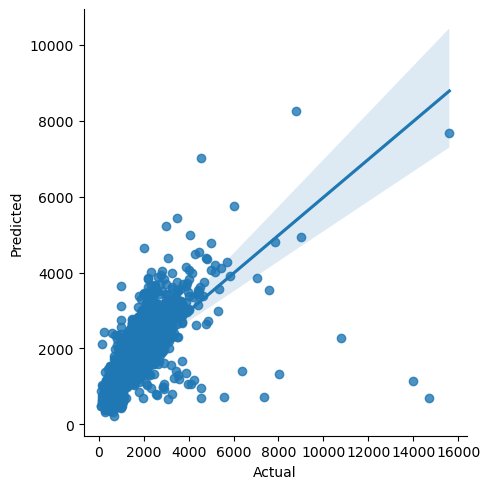

In [404]:
#create dataframe comparing 
Area = pd.DataFrame({'Actual':y_test_1 , 'Predicted':Area2_pred},columns=['Actual','Predicted'])
sns.lmplot(x='Actual',y='Predicted', data=Area)
comparision.head(100)

### Now we have saved, 2 models One is for Rental Price Prediction i.e., Gradient Boosting model which accuracy is 64.6% and  Next For Area Prediction i.e.,  Linear Regression model whose accuracy is 44.1%. So in this project Rental Price prediction is better compared to Area Prediction.